In [1]:
laptop = False
xps = True

if laptop:
    rootF = 'C:/Users/goethas/'
elif xps:
    rootF = 'C:/Users/Sarah/'
    rootData = 'D:/Data/'
else:
    rootF = '/home/sarah/'

In [2]:
import os as os
import sys
import numpy as np
import csv

from numpy import *
from scipy.stats import linregress
from scipy.signal import correlate
import pickle as pickle
import pandas as pd
from tqdm.auto import tqdm

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from shared.save_load import *

In [4]:
exp = 20211207

# Experiment conditions
from shared.parameters_stimulation2 import *
pixel_size_um = 3.5
pixel_per_check = 12
nb_checks = 60

# Load data

In [5]:
data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

### Spike counts

In [6]:
blur_data = load(data_path + str(exp) + '_selected_cells_spike_count_with_noise.npz')

spike_counts = blur_data['spike_count']
spike_counts_mean = blur_data['spike_count_mean']
spike_counts_std = blur_data['spike_count_std']
clusters = blur_data['clusters']

Ncells = len(clusters)

print (shape(spike_counts))

(132, 4, 2, 9, 4, 25)


In [7]:
# from code: "2_Select_clusters_makeSTA.ipynb"

cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

data_clusters = list(cell_data.keys())

### Baden types

In [8]:
# Load Baden types
exp_path = rootF + '/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

# Load cells
cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
cells_clustering = array(cells_clustering)
cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden')

# Attribute its type to each selected cell
selected_cells_type = np.zeros((Ncells))
for i, cell in enumerate(clusters):
    idx_cell = where(cells_clustering == cell)
    if len(idx_cell[0]) > 0:
        selected_cells_type[i] = int(cell_types[idx_cell[0][0]])
        print (cell, cells_clustering[idx_cell], cell_types[idx_cell[0][0]])
    else:
        print(cell, 'no type')

6 [6] 31.0
26 [26] 4.0
33 [33] 15.0
41 [41] 24.0
44 [44] 10.0
45 [45] 24.0
52 [52] 29.0
59 [59] 31.0
60 [60] 20.0
61 [61] 31.0
63 [63] 1.0
64 [64] 20.0
65 [65] 30.0
69 [69] 7.0
74 no type
77 [77] 23.0
85 [85] 31.0
89 [89] 17.0
95 [95] 17.0
98 [98] 17.0
100 [100] 11.0
103 [103] 22.0
104 no type
107 [107] 17.0
110 [110] 22.0
114 [114] 1.0
120 [120] 1.0
129 [129] 23.0
141 [141] 31.0
145 [145] 22.0
146 no type
148 [148] 8.0
149 [149] 30.0
155 [155] 12.0
160 [160] 22.0
161 [161] 26.0
165 [165] 31.0
176 no type
179 [179] 22.0
182 [182] 31.0
183 [183] 6.0
184 [184] 23.0
186 [186] 17.0
197 [197] 24.0
205 [205] 5.0
210 [210] 16.0
217 [217] 23.0
218 [218] 12.0
220 [220] 7.0
229 [229] 23.0
235 [235] 22.0
240 [240] 3.0
246 [246] 23.0
247 [247] 24.0
249 [249] 20.0
253 [253] 3.0
265 [265] 20.0
267 [267] 24.0
269 [269] 28.0
272 [272] 11.0
275 no type
277 [277] 3.0
278 [278] 7.0
283 [283] 31.0
298 [298] 1.0
302 [302] 15.0
303 [303] 8.0
310 [310] 23.0
314 no type
315 [315] 8.0
316 [316] 28.0
326 [326] 

In [9]:
Folder = rootF + '/Documents/Myopia/Data analysis/calcium_comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     

# euler_labels

In [10]:
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

# Cross-corr to check cells in a type

In [12]:
# Cell 165 is an ON-OFF local OS
cell_nb = 165
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 13


OFF DS : [ 63 114 120 298 583]
[0.65791195 0.84626971 0.89466757 0.79642615]
[0.65791195 0.69287361 0.66733297 0.65793341]
[0.84626971 0.69287361 0.8936929  0.79772048]
[0.89466757 0.66733297 0.8936929  0.7831118 ]
[0.79642615 0.65793341 0.79772048 0.7831118 ]


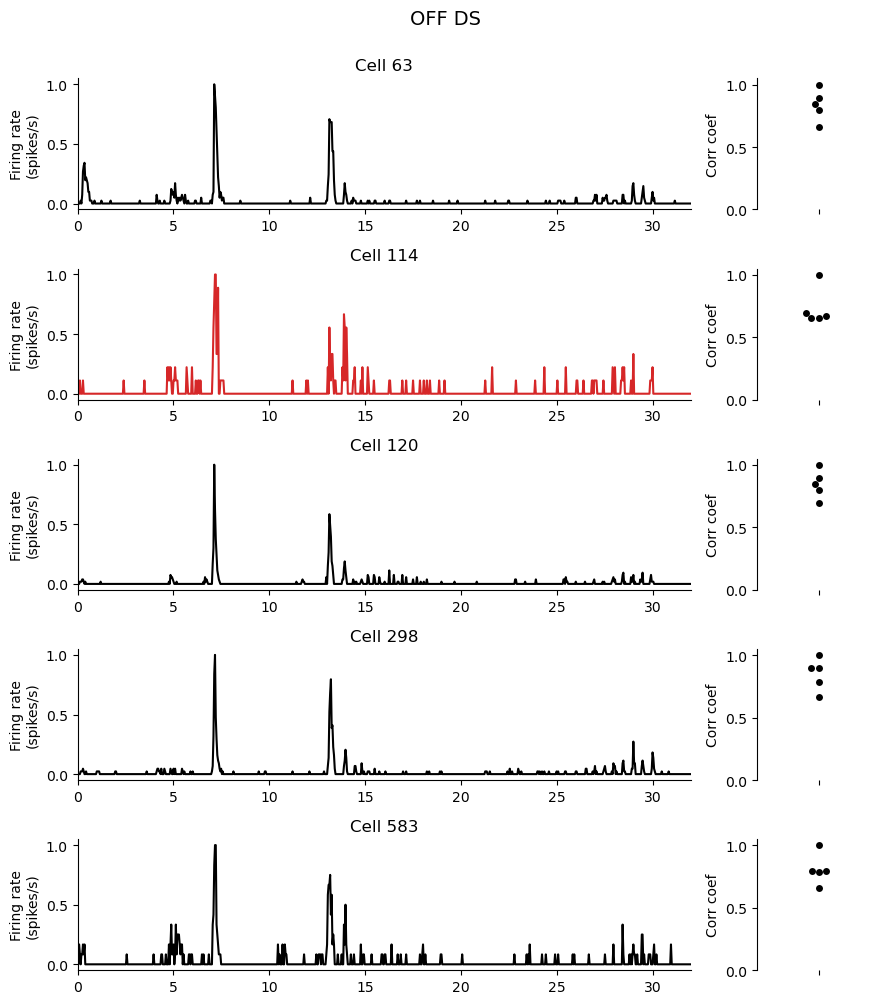

OFF slow : [240 253 277 378]
[0.5346527  0.62775876 0.55170625]
[0.5346527  0.80799765 0.88146182]
[0.62775876 0.80799765 0.82323901]
[0.55170625 0.88146182 0.82323901]


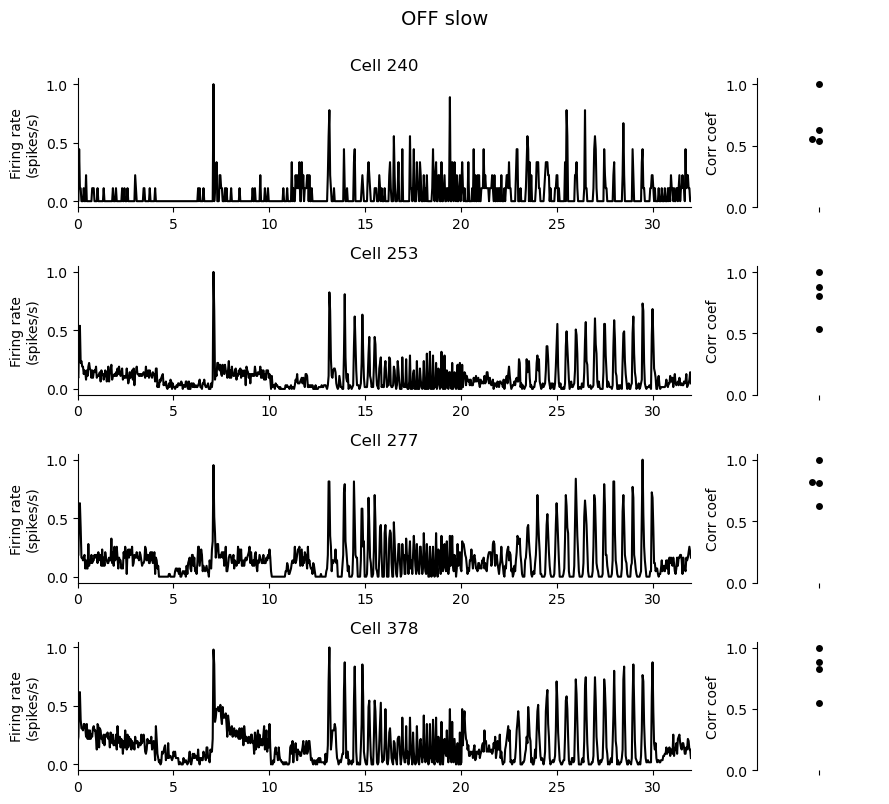

OFF alpha sustained : [ 26 421]
[0.81209053]
[0.81209053]


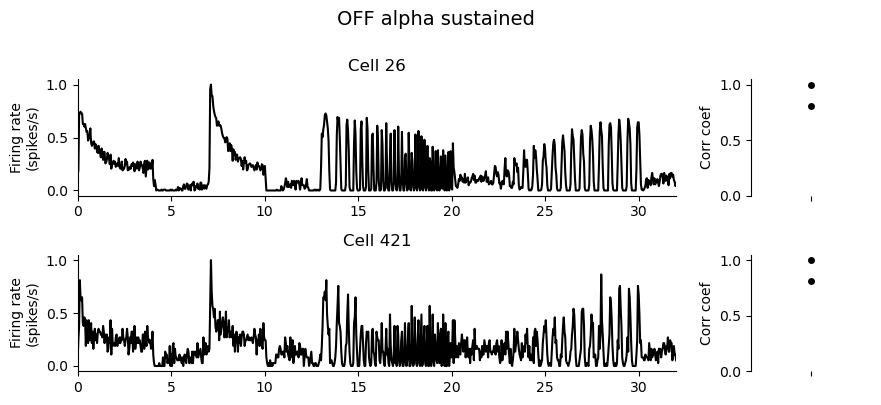

ON-OFF JAM-B : [205 507]
[0.94205608]
[0.94205608]


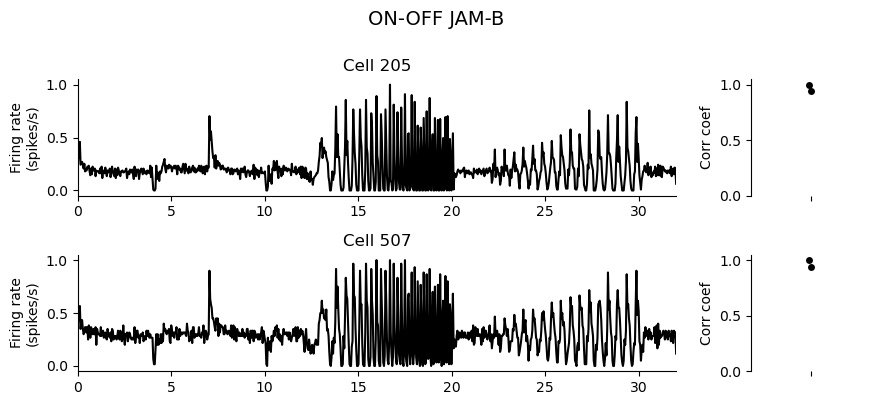

OFF sustained : [183 394 414 433 437 459 471 515]
[0.14620766 0.13705007 0.13757685 0.56550315 0.17350644 0.11206929
 0.05853805]
[ 0.14620766  0.93800728  0.87697063 -0.13245387  0.91450537  0.94043209
  0.80936852]
[ 0.13705007  0.93800728  0.86294029 -0.13674489  0.9219082   0.9424274
  0.80479747]
[ 0.13757685  0.87697063  0.86294029 -0.14129381  0.83353666  0.88397239
  0.77811465]
[ 0.56550315 -0.13245387 -0.13674489 -0.14129381 -0.10004608 -0.1347675
 -0.14328007]
[ 0.17350644  0.91450537  0.9219082   0.83353666 -0.10004608  0.90599352
  0.7861911 ]
[ 0.11206929  0.94043209  0.9424274   0.88397239 -0.1347675   0.90599352
  0.80809037]
[ 0.05853805  0.80936852  0.80479747  0.77811465 -0.14328007  0.7861911
  0.80809037]


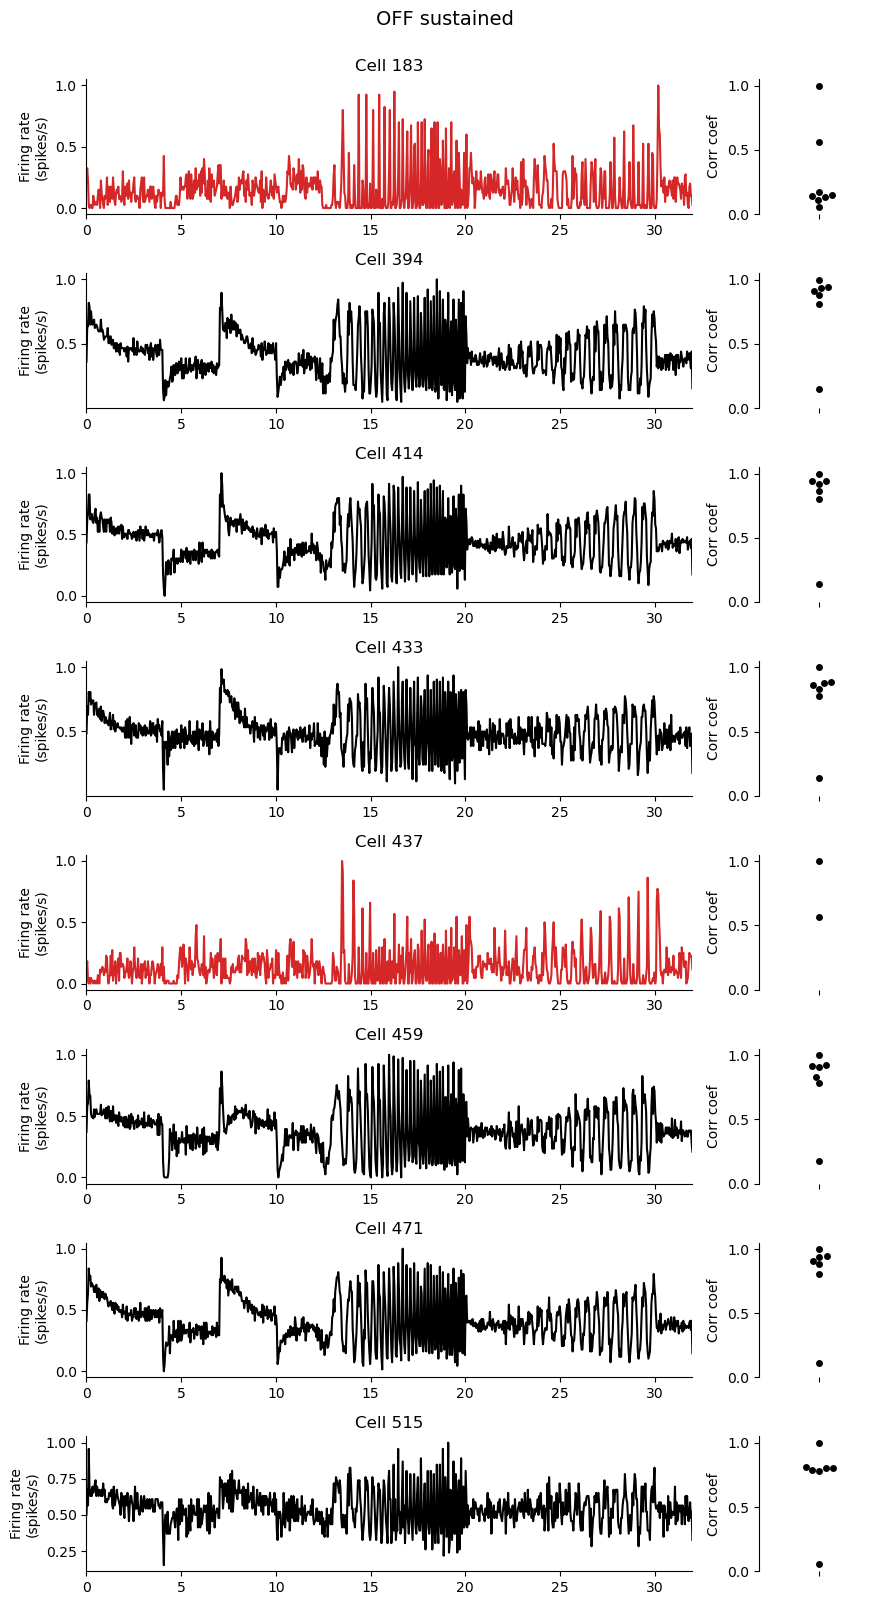

OFF alpha transient : [ 69 220 278]
[0.49744908 0.43088765]
[0.49744908 0.6435202 ]
[0.43088765 0.6435202 ]


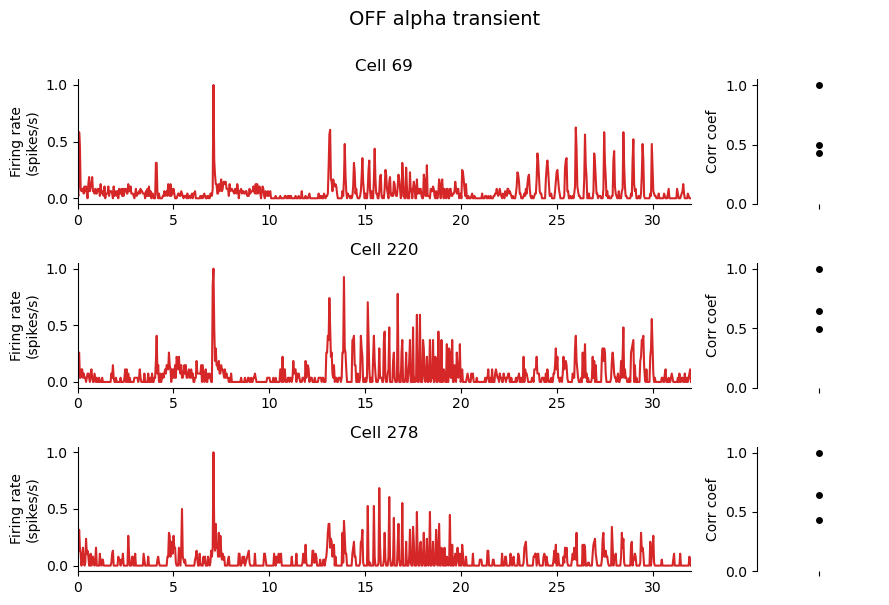

OFF mini alpha transient : [148 303 315 398 426 506 538]
[0.93280472 0.69485231 0.94765415 0.953613   0.83398241 0.94922749]
[0.93280472 0.65220916 0.96286446 0.93287817 0.89816785 0.94631131]
[0.69485231 0.65220916 0.65394855 0.67277497 0.64141397 0.66784872]
[0.94765415 0.96286446 0.65394855 0.95300863 0.87874405 0.95037208]
[0.953613   0.93287817 0.67277497 0.95300863 0.81414704 0.95804617]
[0.83398241 0.89816785 0.64141397 0.87874405 0.81414704 0.8342427 ]
[0.94922749 0.94631131 0.66784872 0.95037208 0.95804617 0.8342427 ]


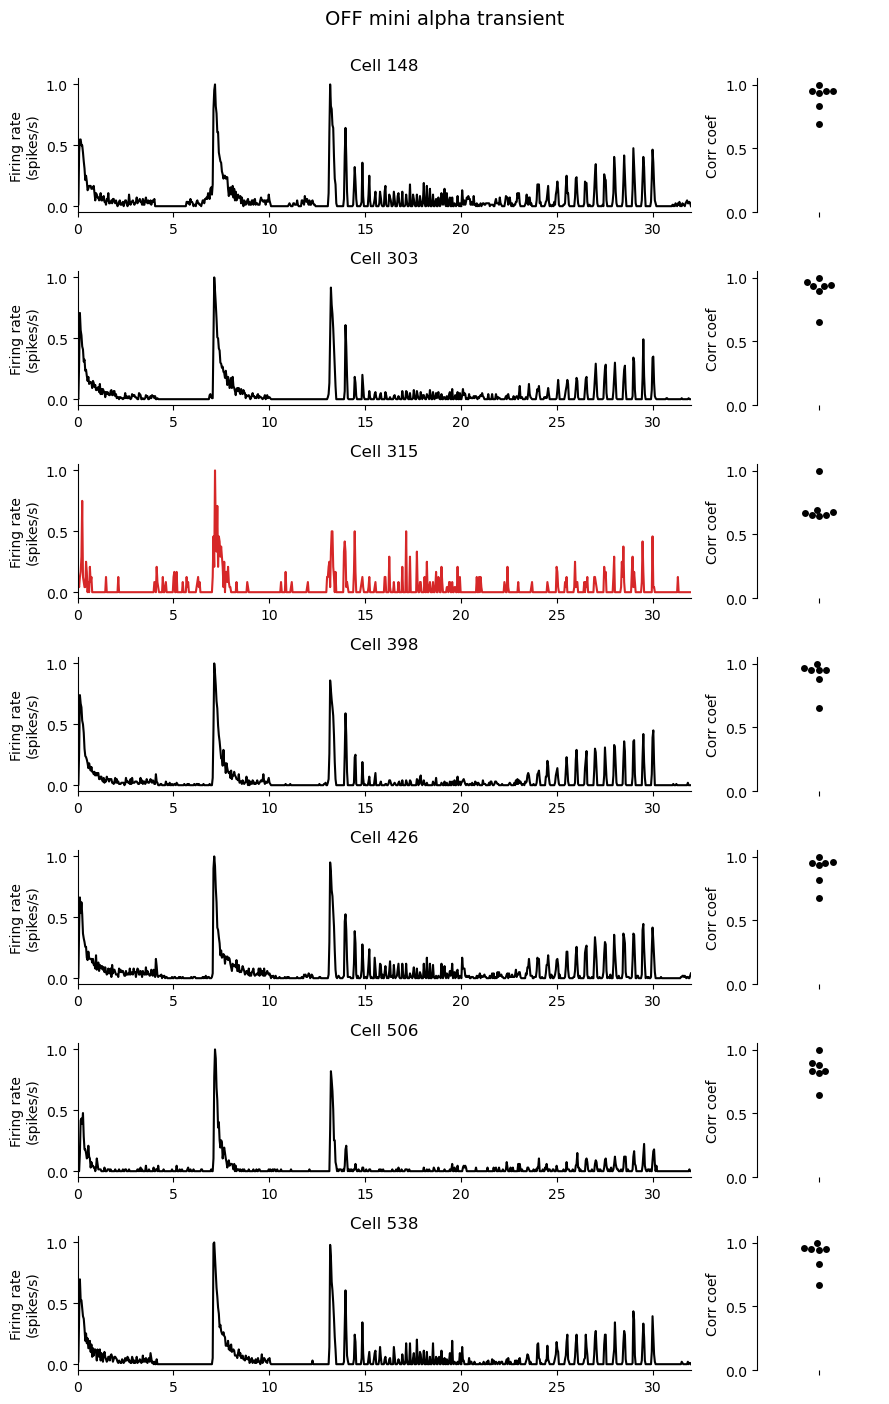

ON-OFF local-edge W3 : [392]
[]


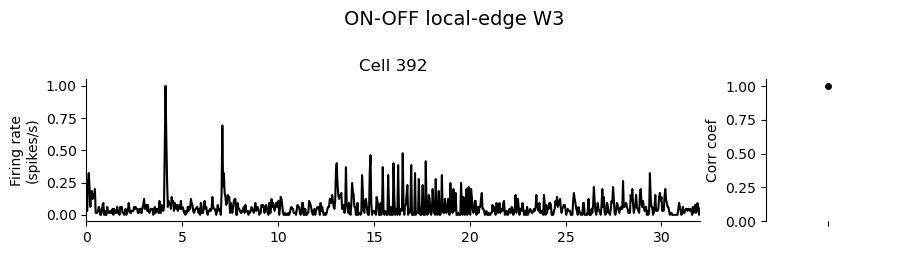

ON-OFF local : [44]
[]


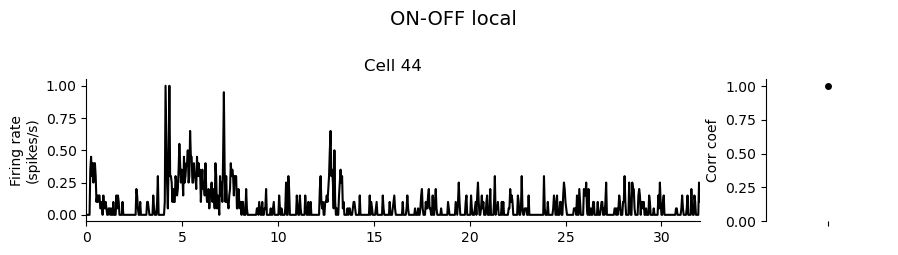

ON-OFF DS 1 : [100 272]
[0.32331961]
[0.32331961]


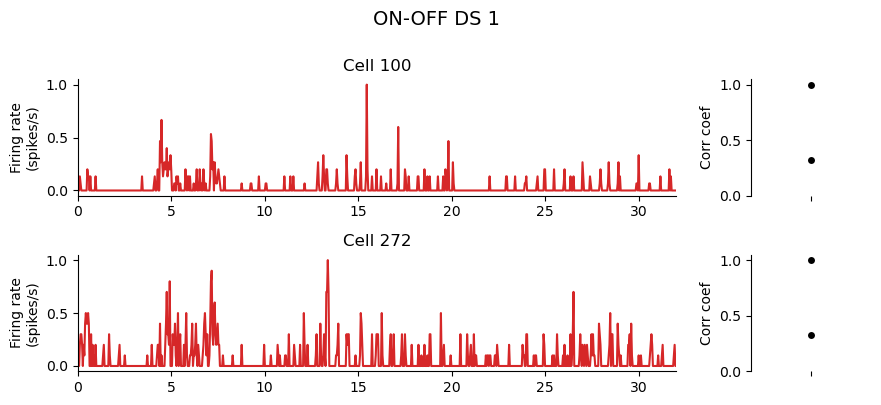

ON-OFF DS 2 : [155 218 395]
[0.58440782 0.53763483]
[0.58440782 0.62247871]
[0.53763483 0.62247871]


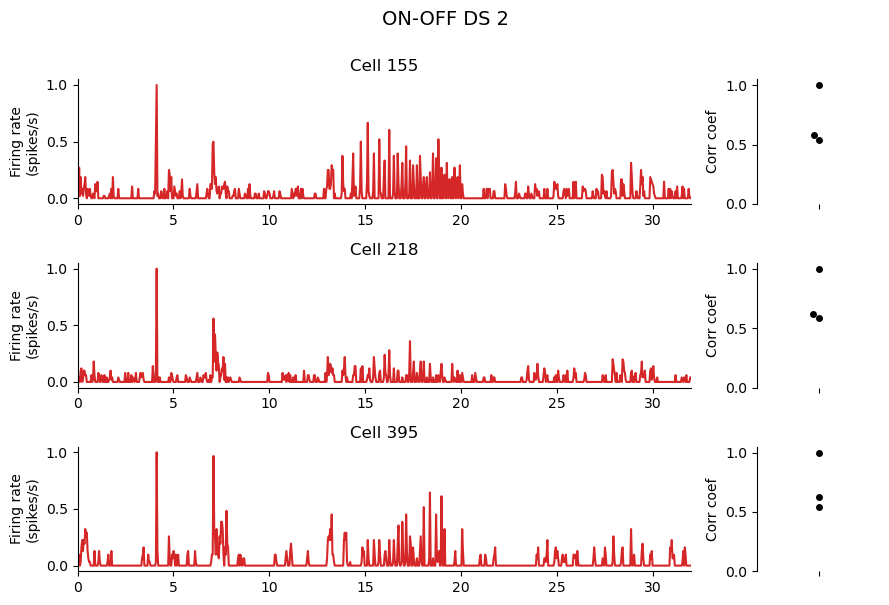

ON-OFF local OS : [165]
[]


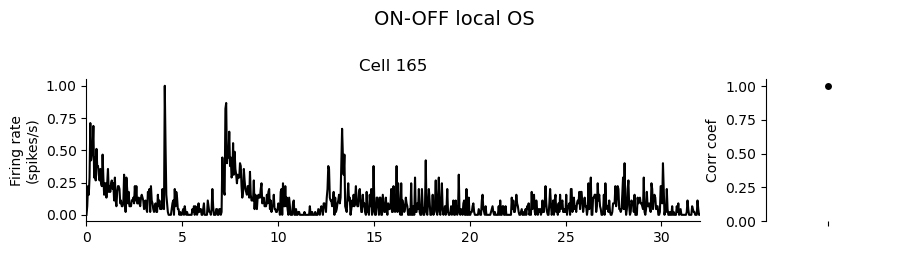

ON DS transient : [ 33 302 328 342]
[0.80634791 0.80366076 0.85004826]
[0.80634791 0.77494161 0.82626772]
[0.80366076 0.77494161 0.89856001]
[0.85004826 0.82626772 0.89856001]


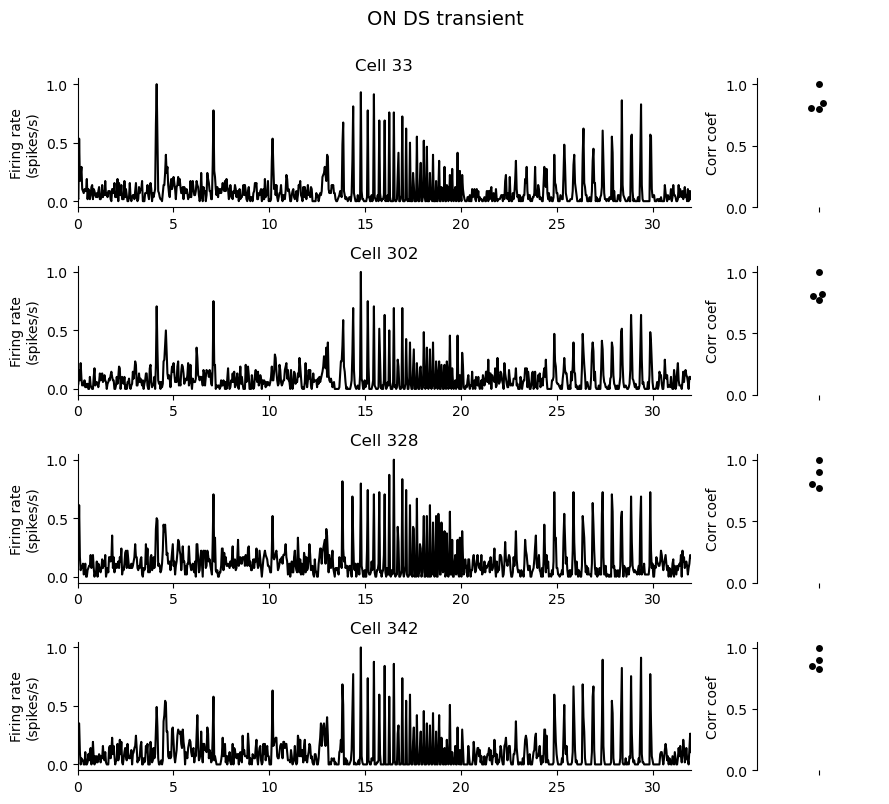

ON local transient OS : [210 585]
[0.79285332]
[0.79285332]


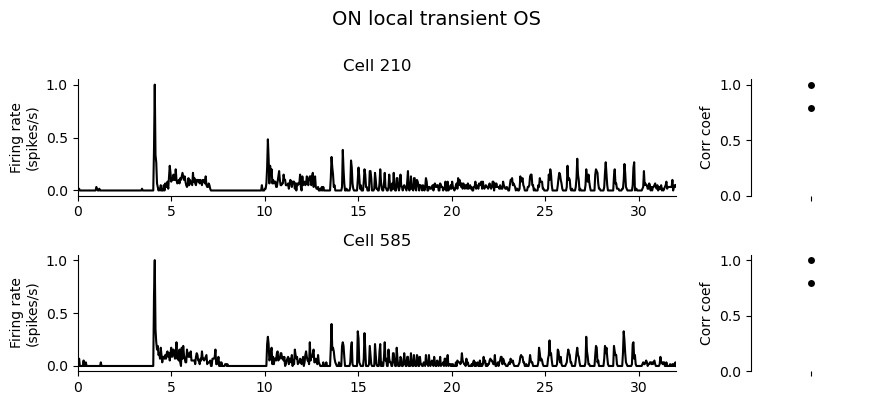

ON transient : [ 89  95  98 107 186]
[0.88092494 0.88447896 0.8448224  0.85905513]
[0.88092494 0.91547099 0.9246246  0.89071262]
[0.88447896 0.91547099 0.95498561 0.82404609]
[0.8448224  0.9246246  0.95498561 0.80552819]
[0.85905513 0.89071262 0.82404609 0.80552819]


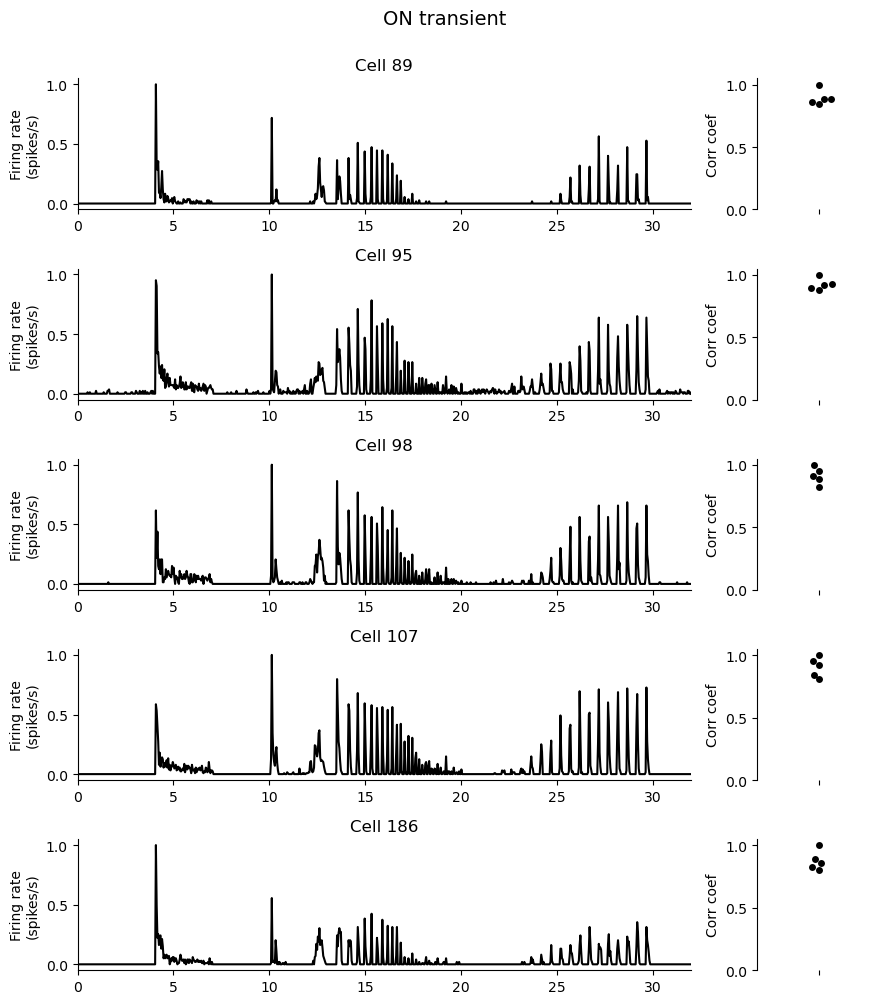

ON transient large : [406]
[]


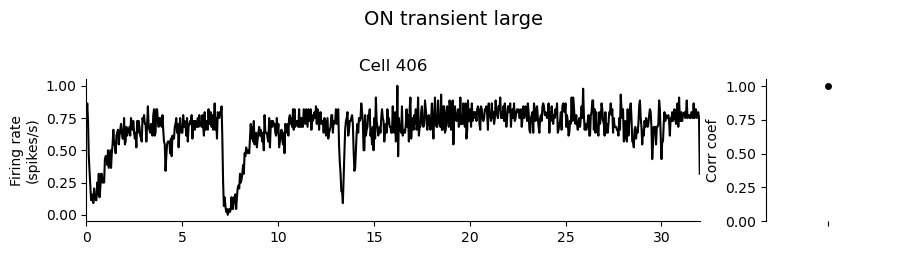

ON low frequency : [ 60  64 249 265]
[0.52870765 0.63169411 0.52242787]
[0.52870765 0.54104019 0.79040471]
[0.63169411 0.54104019 0.63099118]
[0.52242787 0.79040471 0.63099118]


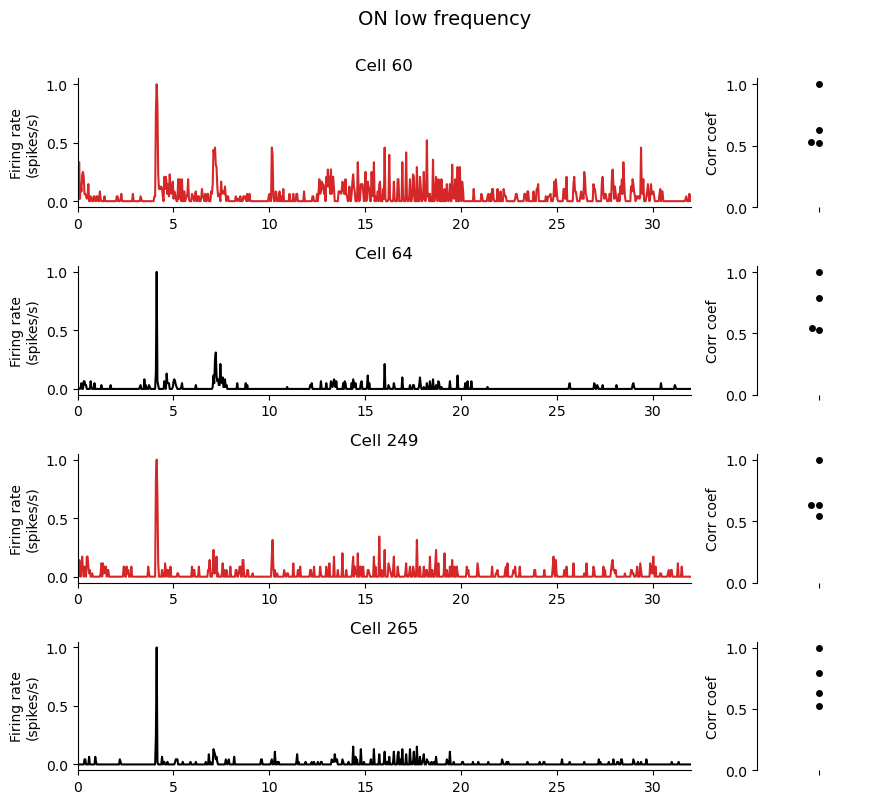

ON mini alpha : [103 110 145 160 179 235 340 399 417 435 462 579]
[0.89227346 0.85575368 0.81997308 0.86808849 0.85520785 0.87904646
 0.73615828 0.95767475 0.89562277 0.93687076 0.90550409]
[0.89227346 0.83424812 0.66794813 0.88101287 0.8058346  0.81611383
 0.78911546 0.91014749 0.85797837 0.9406276  0.9154033 ]
[0.85575368 0.83424812 0.67258004 0.84736156 0.76544868 0.8535251
 0.6950719  0.87240323 0.78760311 0.84892076 0.82656087]
[0.81997308 0.66794813 0.67258004 0.64963674 0.73600548 0.7314984
 0.59736244 0.79784259 0.77990135 0.75426119 0.70462716]
[0.86808849 0.88101287 0.84736156 0.64963674 0.7460616  0.80924698
 0.67241067 0.87690193 0.7879739  0.88021482 0.8637915 ]
[0.85520785 0.8058346  0.76544868 0.73600548 0.7460616  0.80334521
 0.73494088 0.8628599  0.82713601 0.82627349 0.79413149]
[0.87904646 0.81611383 0.8535251  0.7314984  0.80924698 0.80334521
 0.71455507 0.88500669 0.85702814 0.85183572 0.83235116]
[0.73615828 0.78911546 0.6950719  0.59736244 0.67241067 0.73494088
 

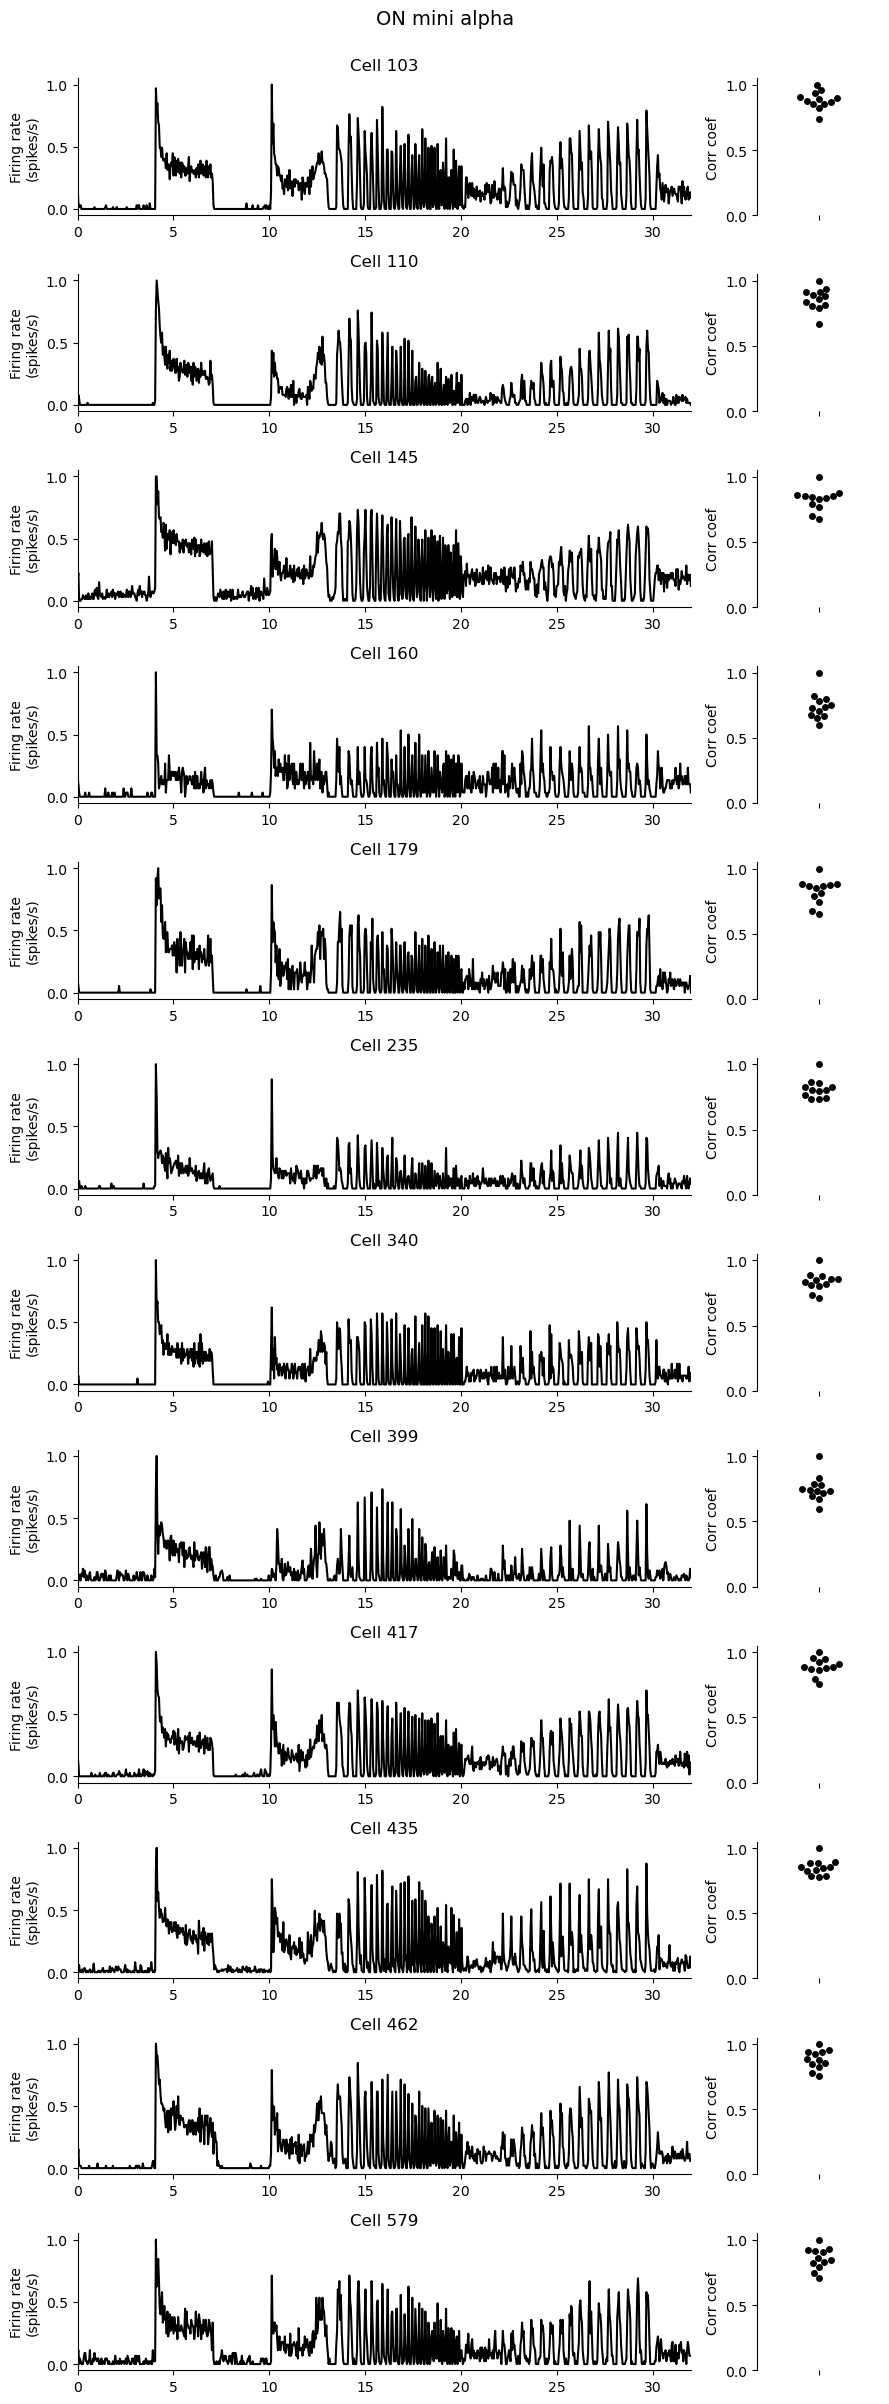

ON alpha : [ 77 129 184 217 229 246 310 381 393 396 405 418 458 472 476 479 491 498]
[0.95418268 0.90894227 0.92757022 0.95526273 0.834693   0.93322005
 0.89922646 0.94286388 0.95379314 0.93325549 0.91460346 0.89596848
 0.93494913 0.93340305 0.9492119  0.94785131 0.91119325]
[0.95418268 0.92891962 0.9480526  0.95362874 0.89272194 0.95369236
 0.93641092 0.95936881 0.93880586 0.96814107 0.9488041  0.93410983
 0.93725424 0.94000107 0.97033444 0.95339713 0.93345293]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.90894227 0.92891962 0.92996109 0.9281973  0.85897328 0.93274359
 0.8912827  0.95723461 0.89039466 0.94327071 0.93874322 0.9322225
 0.95006783 0.91523076 0.94452088 0.92600628 0.87403537]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.92757022 0.9480526  0.92996109 0.95443229 0.91915612 0.95811245
 0.92772205 0.9659147  0.87894508 0.94988645 0.97235044 0.97020999
 0.9288222  0.96494694 0.95130914 0.95817302 0.92580861]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.95526273 0.95362874 0.9281973  0.95443229 0.86405866 0.9603916
 0.9030971  0.95965453 0.90621766 0.93861399 0.94839831 0.92328769
 0.93468584 0.96913378 0.94900936 0.9573065  0.90660849]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.834693   0.89272194 0.85897328 0.91915612 0.86405866 0.88818766
 0.91702308 0.89442393 0.80803958 0.90200078 0.90951372 0.93072768
 0.84915945 0.87884327 0.90436085 0.8814137  0.89236907]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.93322005 0.95369236 0.93274359 0.95811245 0.9603916  0.88818766
 0.91499908 0.96373616 0.89710471 0.94711526 0.96342954 0.93940836
 0.94630269 0.96005656 0.9554472  0.95475228 0.9084099 ]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.89922646 0.93641092 0.8912827  0.92772205 0.9030971  0.91702308
 0.91499908 0.92820476 0.90621105 0.95466654 0.92652112 0.93898412
 0.8909566  0.89530741 0.94398929 0.91802058 0.94593833]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.94286388 0.95936881 0.95723461 0.9659147  0.95965453 0.89442393
 0.96373616 0.92820476 0.9212495  0.96697295 0.96710393 0.96198519
 0.97349352 0.95028712 0.97137459 0.94995291 0.9145684 ]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.95379314 0.93880586 0.89039466 0.87894508 0.90621766 0.80803958
 0.89710471 0.90621105 0.9212495  0.93117729 0.87962799 0.87195561
 0.92514336 0.8715774  0.93783892 0.90560382 0.89552033]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.93325549 0.96814107 0.94327071 0.94988645 0.93861399 0.90200078
 0.94711526 0.95466654 0.96697295 0.93117729 0.95720916 0.95891157
 0.94761421 0.92180919 0.97258307 0.94357355 0.93089718]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[0.91460346 0.9488041  0.93874322 0.97235044 0.94839831 0.90951372
 0.96342954 0.92652112 0.96710393 0.87962799 0.95720916 0.96816847
 0.93845504 0.95453854 0.95437028 0.94717341 0.91513616]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.8% of the points 

[0.89596848 0.93410983 0.9322225  0.97020999 0.92328769 0.93072768
 0.93940836 0.93898412 0.96198519 0.87195561 0.95891157 0.96816847
 0.93196582 0.92571702 0.95160811 0.92784662 0.91558848]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.8% of the points 

[0.93494913 0.93725424 0.95006783 0.9288222  0.93468584 0.84915945
 0.94630269 0.8909566  0.97349352 0.92514336 0.94761421 0.93845504
 0.93196582 0.92355858 0.95310291 0.92584751 0.87512687]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.8% of the points 

[0.93340305 0.94000107 0.91523076 0.96494694 0.96913378 0.87884327
 0.96005656 0.89530741 0.95028712 0.8715774  0.92180919 0.95453854
 0.92571702 0.92355858 0.94041045 0.96303736 0.90104944]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.8% of the points 

[0.9492119  0.97033444 0.94452088 0.95130914 0.94900936 0.90436085
 0.9554472  0.94398929 0.97137459 0.93783892 0.97258307 0.95437028
 0.95160811 0.95310291 0.94041045 0.94840268 0.92439499]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.8% of the points 

[0.94785131 0.95339713 0.92600628 0.95817302 0.9573065  0.8814137
 0.95475228 0.91802058 0.94995291 0.90560382 0.94357355 0.94717341
 0.92784662 0.92584751 0.96303736 0.94840268 0.92394627]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.8% of the points 

[0.91119325 0.93345293 0.87403537 0.92580861 0.90660849 0.89236907
 0.9084099  0.94593833 0.9145684  0.89552033 0.93089718 0.91513616
 0.91558848 0.87512687 0.90104944 0.92439499 0.92394627]


C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.8% of the points 

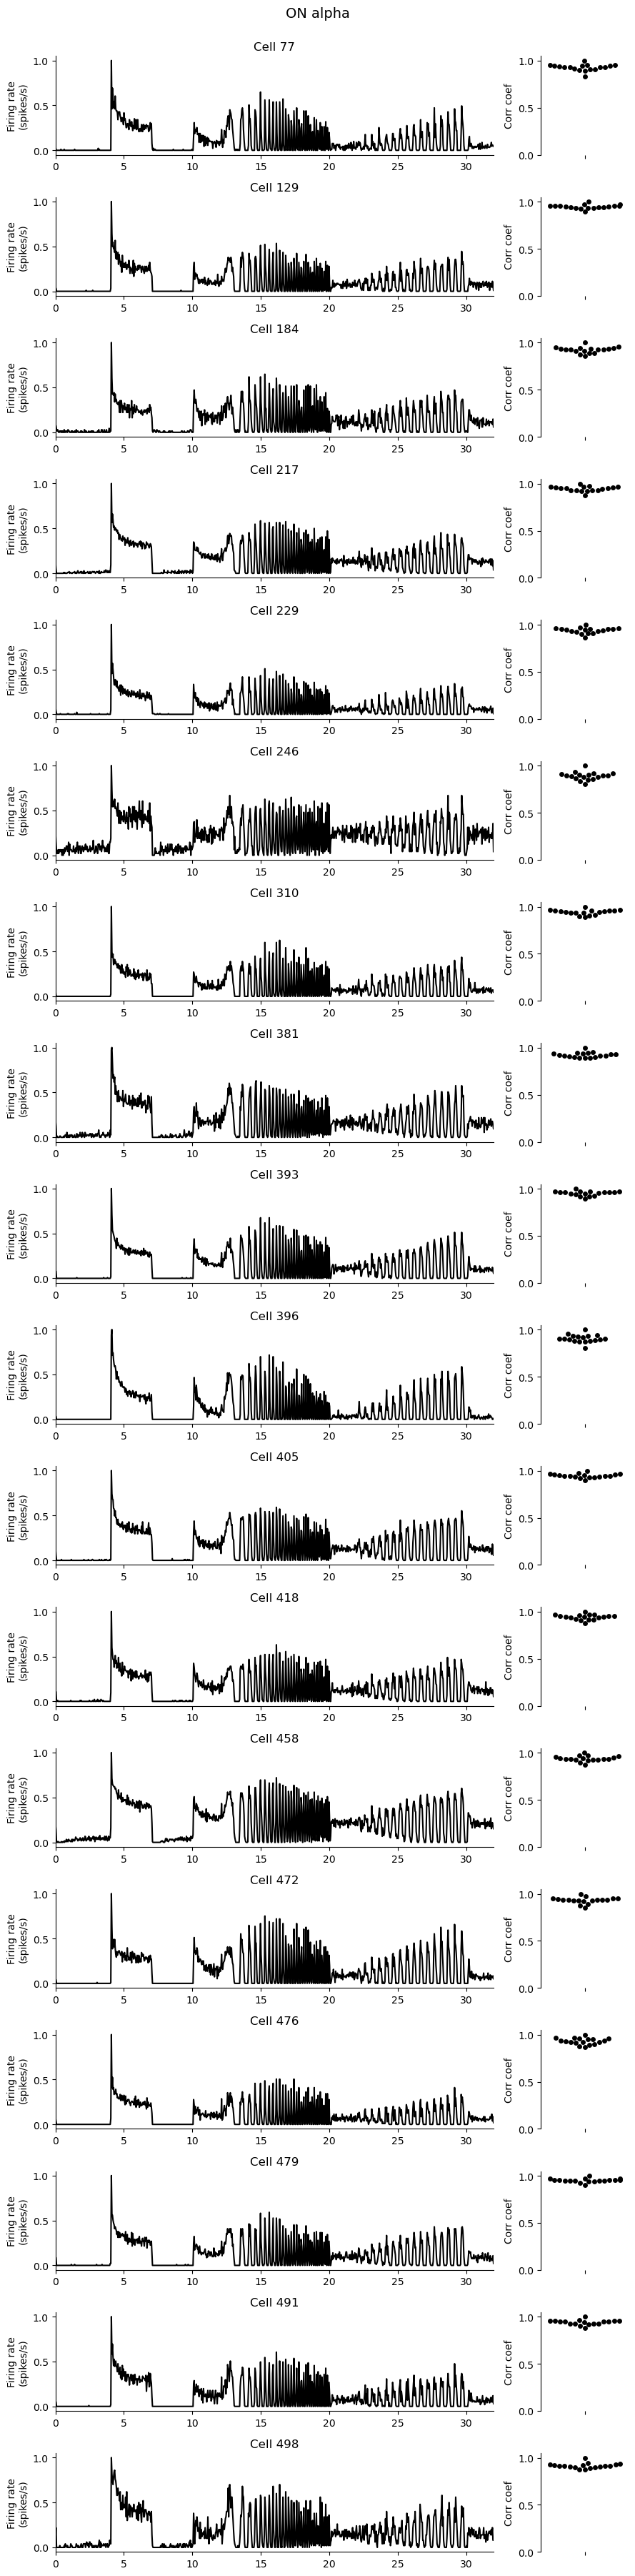

ON DS sustained 1 : [ 41  45 197 247 267 444]
[0.87526864 0.79305822 0.87469433 0.82484407 0.87530942]
[0.87526864 0.78062044 0.86512683 0.89459855 0.85537298]
[0.79305822 0.78062044 0.83543179 0.73335596 0.79364573]
[0.87469433 0.86512683 0.83543179 0.85747389 0.94900745]
[0.82484407 0.89459855 0.73335596 0.85747389 0.83017372]
[0.87530942 0.85537298 0.79364573 0.94900745 0.83017372]


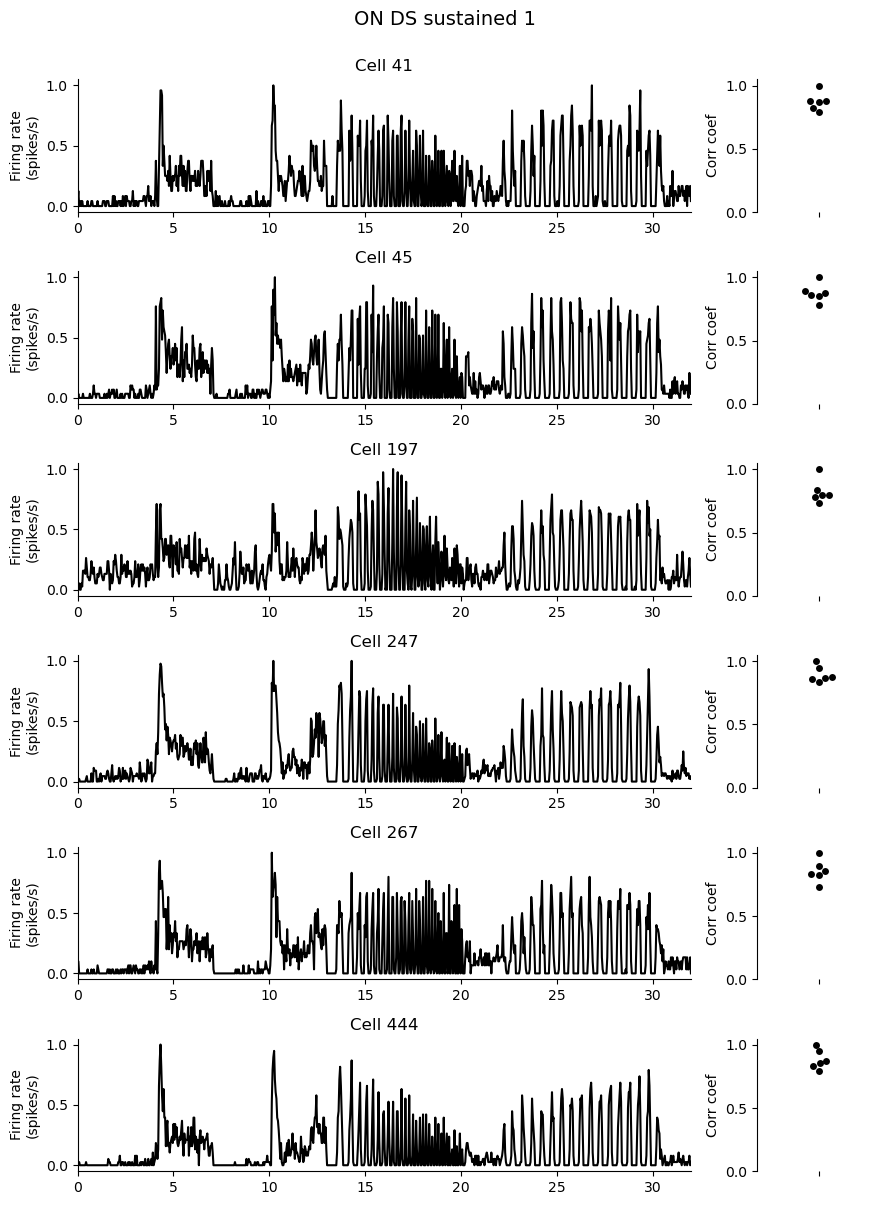

ON slow : [161 584]
[0.69629905]
[0.69629905]


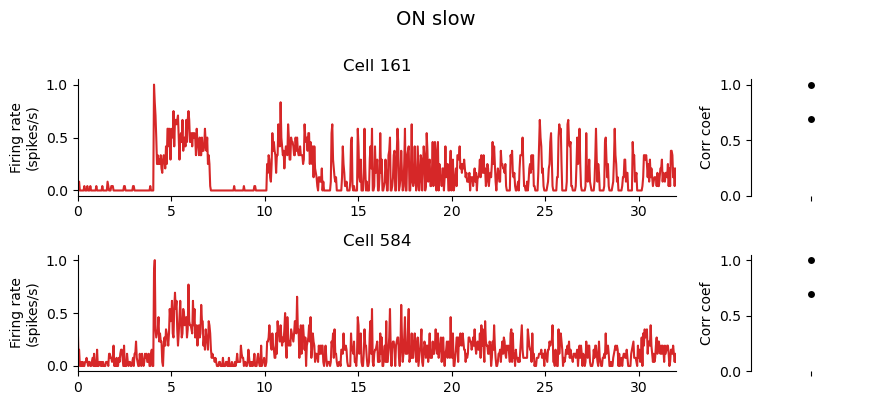

ON DS sustained 3 : [269 316 363]
[0.84320864 0.49114197]
[0.84320864 0.45040125]
[0.49114197 0.45040125]


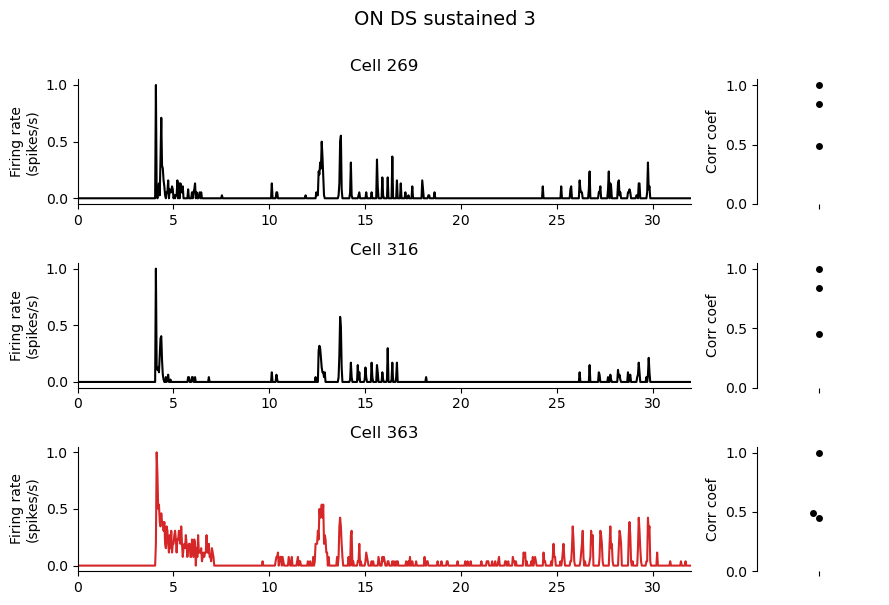

ON local sustained OS : [ 52 359 575]
[0.10923158 0.71593528]
[ 0.10923158 -0.0827132 ]
[ 0.71593528 -0.0827132 ]


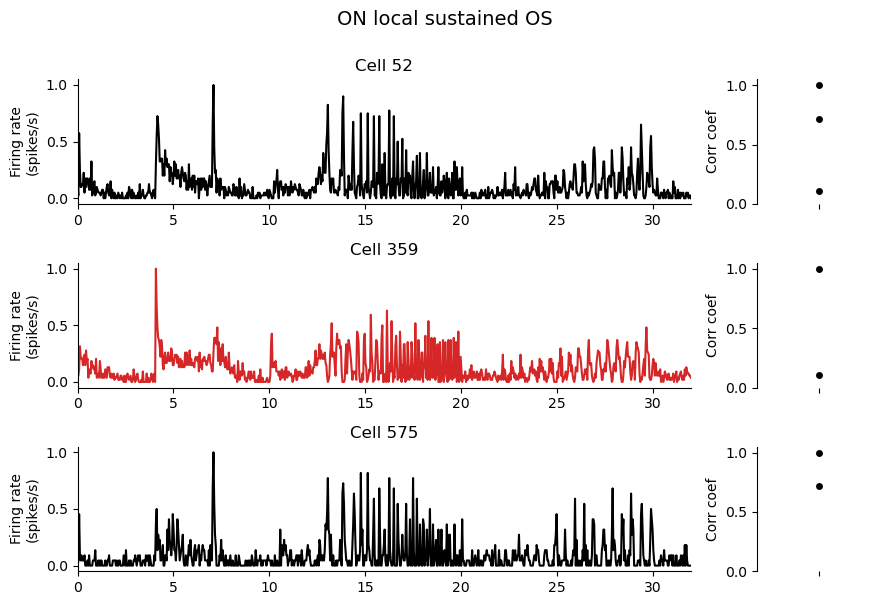

OFF suppression 1 : [ 65 149]
[0.4782852]
[0.4782852]


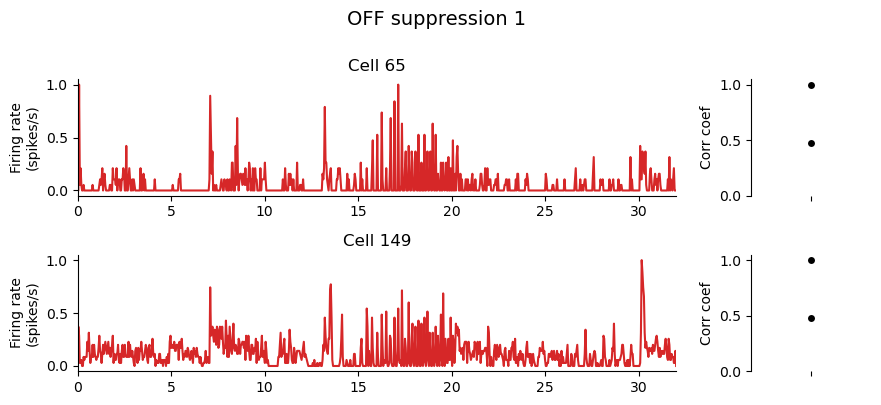

OFF suppression 2 : [  6  59  61  85 141 182 283 326 402 416 501]
[0.73120125 0.35340441 0.51085662 0.49579175 0.59776343 0.65198122
 0.3920848  0.19737633 0.59869365 0.72968038]
[0.73120125 0.58456349 0.59875051 0.64992667 0.64142269 0.75585351
 0.5993157  0.13901968 0.75208946 0.74652949]
[0.35340441 0.58456349 0.50781331 0.495351   0.49160696 0.56036465
 0.5393642  0.1183366  0.69526437 0.53339211]
[0.51085662 0.59875051 0.50781331 0.46787229 0.65206709 0.57355042
 0.56181888 0.03945356 0.55920854 0.5754946 ]
[0.49579175 0.64992667 0.495351   0.46787229 0.52332119 0.5979722
 0.388692   0.13198096 0.61844852 0.56920923]
[0.59776343 0.64142269 0.49160696 0.65206709 0.52332119 0.64790783
 0.67007239 0.05079238 0.667185   0.62372019]
[0.65198122 0.75585351 0.56036465 0.57355042 0.5979722  0.64790783
 0.61531729 0.14304032 0.74028883 0.74886657]
[ 0.3920848   0.5993157   0.5393642   0.56181888  0.388692    0.67007239
  0.61531729 -0.12487247  0.63327623  0.57357927]
[ 0.19737633  0.13901

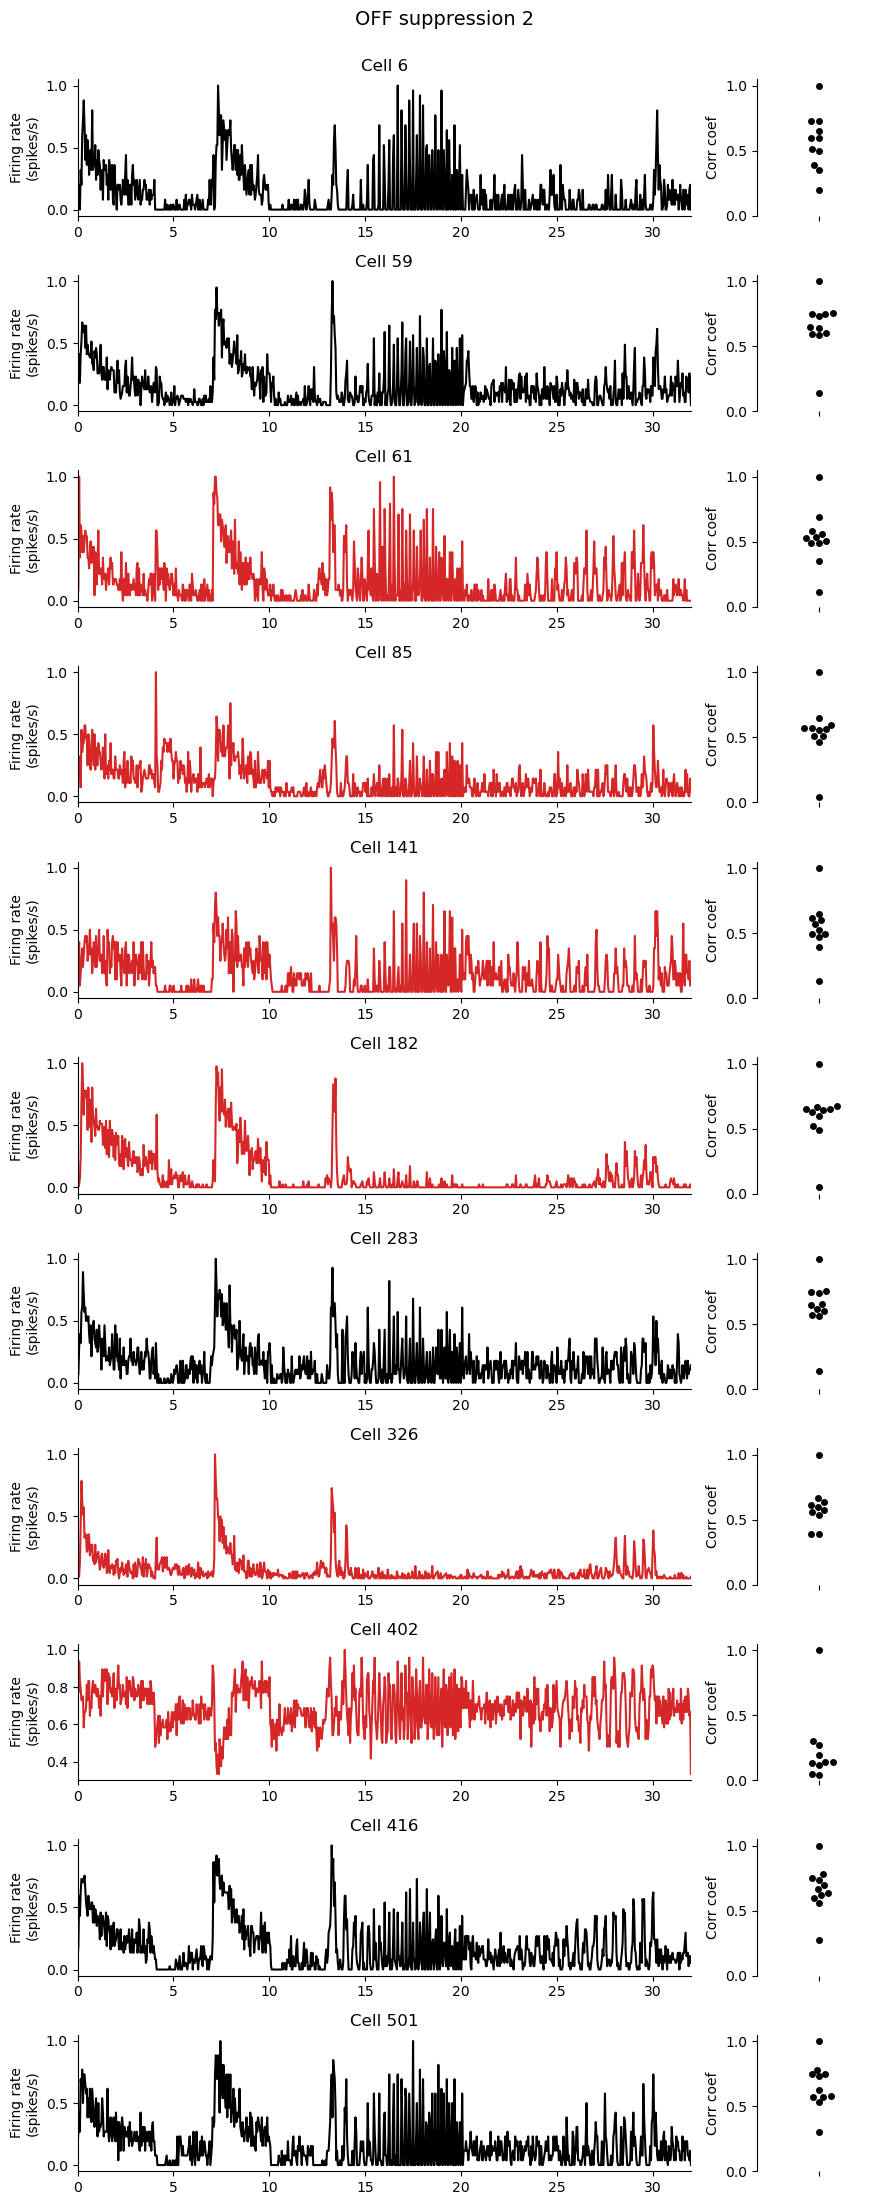

In [13]:
cell_types_cleaned = np.copy(cell_types)
# euler_labels_cleaning = zeros(len(euler_labels)) # 0: present but not cleaned type not present, 1: , 2: cleaned

baseline_len = 4 # sec
dt = 0.04 # sec
baseline_end = int(baseline_len / dt)

removed_cells = []

for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(9, 2.5))
        else:
            fig = plt.figure(figsize=(9, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 2, width_ratios = [5,1])

        cross_corrs = np.zeros((len(selected_cells), len(selected_cells)))

        for i, cell_nb in enumerate(selected_cells):
            cell_index = where(cells_clustering == cell_nb)[0][0]
#             print (cell_nb, cells_clustering[cell_index])

            psth = cell_data[cell_nb]['psth']

            # Normalization
            psth = psth/max(psth)

            # Cross corr
            for j, cell_nb2 in enumerate(selected_cells):
                psth2 = cell_data[cell_nb2]['psth']
                # Normalization
                psth2 = psth2/max(psth2)

                cross_corrs[i,j] = np.corrcoef(psth, psth2)[0,1]
            
            # Remove that cell ?
            print (np.delete(cross_corrs[i], i))
            
            ax = fig.add_subplot(GS[i,0])
            
            if euler_label_names[iLabel] == 'ON local sustained OS' or euler_label_names[iLabel] == 'OFF suppression 2':
                threshold = 0.7
            elif euler_label_names[iLabel] == 'OFF slow':
                threshold = 0.5
            else:
                threshold = 0.75
            
            if len(selected_cells) > 1 and all(delete(cross_corrs[i], i) < threshold):
                ax.plot(np.linspace(0,32,800), psth, 'C3')
                removed_cells.append(cell_nb)
                cell_types_cleaned[cell_index] = nan
            else:
                ax.plot(np.linspace(0,32,800), psth, 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
                
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
                
            ax = fig.add_subplot(GS[i,1])
            sns.swarmplot(y=cross_corrs[i], color='k')
            ax.set_ylim(0,1.05)
            ax.set_ylabel('Corr coef')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        
        plt.tight_layout()

#         plt.figure()
#         plt.title(cell_type)
#         sns.heatmap(cross_corrs, xticklabels=selected_cells, yticklabels=selected_cells, vmin = 0, vmax = 1)

        plt.show()
        
#         # Removing bad cells (except if all cells are bad in a type, in which case we keep them)
#         print ('Removed', len(removed_cells), 'cells among', len(selected_cells))
        
#         if len(removed_cells) < len(selected_cells):
#             cell_types_cleaned[removed_cells] = nan
#             euler_labels_cleaning[iLabel] = 2
#         elif len(removed_cells) == len(selected_cells):
#             euler_labels_cleaning[iLabel] = 1

#         # Other try: when all cells in a type have low cross corr, we also set their type to NAN and will compare the new
#         # and old types later
#         print ('Removed', len(removed_cells), 'cells among', len(selected_cells))
#         cell_types_cleaned[removed_cells] = nan
        

In [14]:
cell_types_cleaned

array([31.,  4., 15., 24., 10., 24., 29., 31., nan, nan,  1., 20., nan,
       nan, 23., nan, 17., 17., 17., nan, 22., 17., 22., nan,  1., 23.,
       nan, 22.,  8., nan, nan, 22., nan, 13., 22., nan, nan, 23., 17.,
       24.,  5., 16., 23., nan, nan, 23., 22.,  3., 23., 24., nan,  3.,
       20., 24., 28., nan,  3., nan, 31.,  1., 15.,  8., 23., nan, 28.,
       nan, 15., 22., 15., nan, nan,  3., 23.,  9., 23.,  6., nan, 23.,
        8., 22., nan, 23., 18.,  6., 31., 22., 23.,  4.,  8.,  6., 22.,
       nan, 24., 23.,  6., 22.,  6., 23., 23., 23., 23., 23., 31.,  8.,
        5.,  6.,  8., 29., 22.,  1., nan, 16.])

In [15]:
cell_types

array([31.,  4., 15., 24., 10., 24., 29., 31., 20., 31.,  1., 20., 30.,
        7., 23., 31., 17., 17., 17., 11., 22., 17., 22.,  1.,  1., 23.,
       31., 22.,  8., 30., 12., 22., 26., 13., 22., 31.,  6., 23., 17.,
       24.,  5., 16., 23., 12.,  7., 23., 22.,  3., 23., 24., 20.,  3.,
       20., 24., 28., 11.,  3.,  7., 31.,  1., 15.,  8., 23.,  8., 28.,
       31., 15., 22., 15., 29., 28.,  3., 23.,  9., 23.,  6., 12., 23.,
        8., 22., 31., 23., 18.,  6., 31., 22., 23.,  4.,  8.,  6., 22.,
        6., 24., 23.,  6., 22.,  6., 23., 23., 23., 23., 23., 31.,  8.,
        5.,  6.,  8., 29., 22.,  1., 26., 16.])

## Plot new types

OFF DS : [ 63 120 298 583]


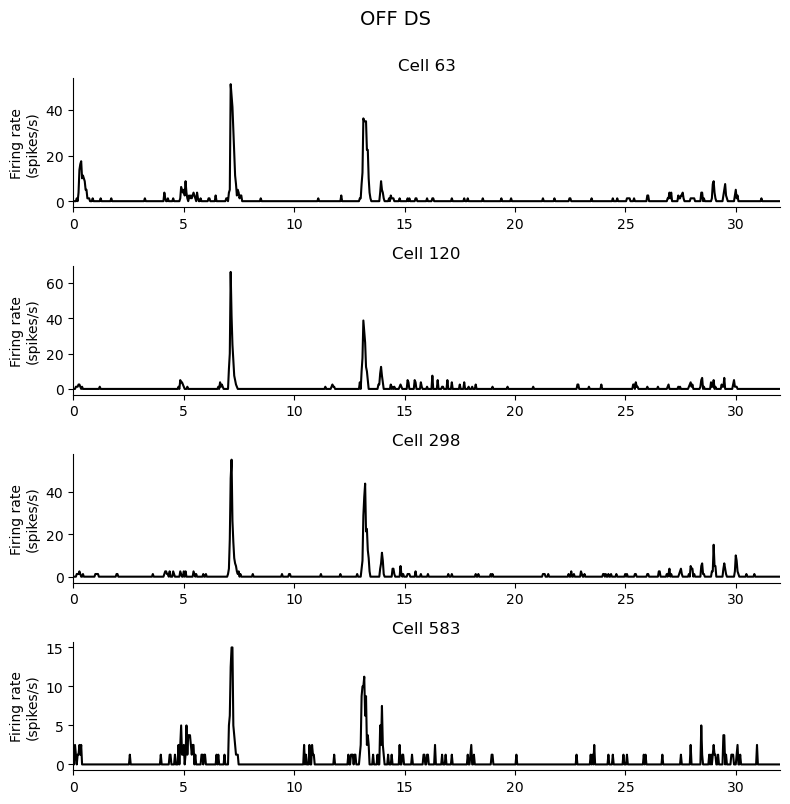

OFF slow : [240 253 277 378]


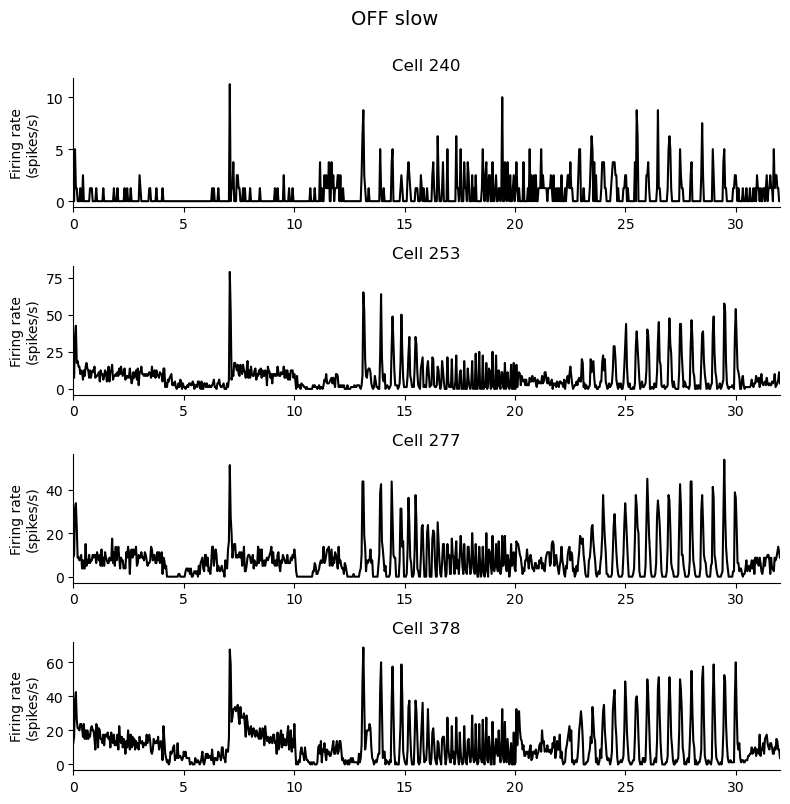

OFF alpha sustained : [ 26 421]


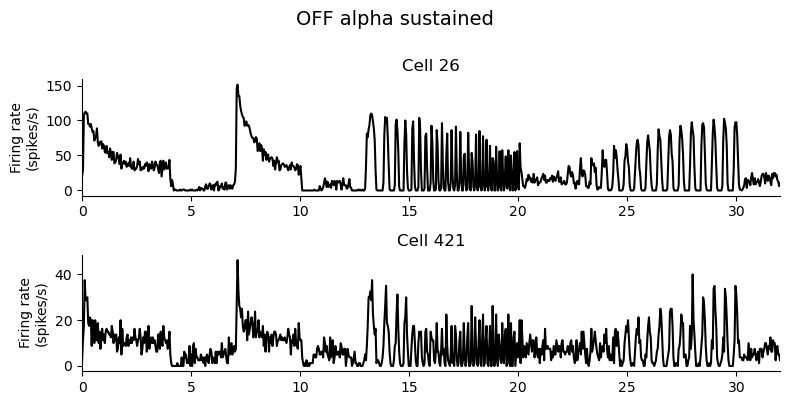

ON-OFF JAM-B : [205 507]


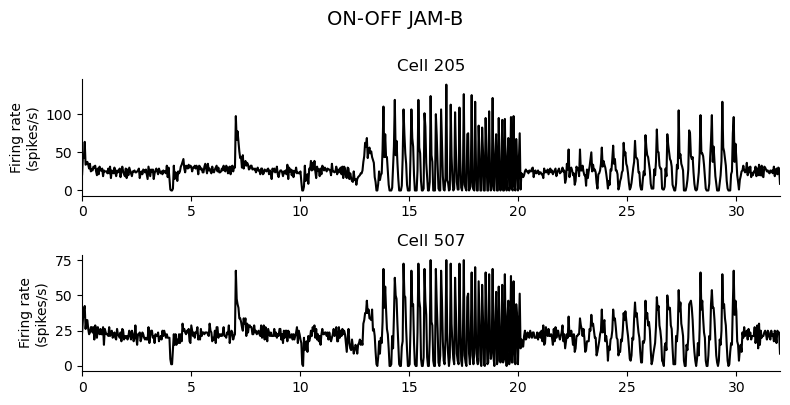

OFF sustained : [394 414 433 459 471 515]


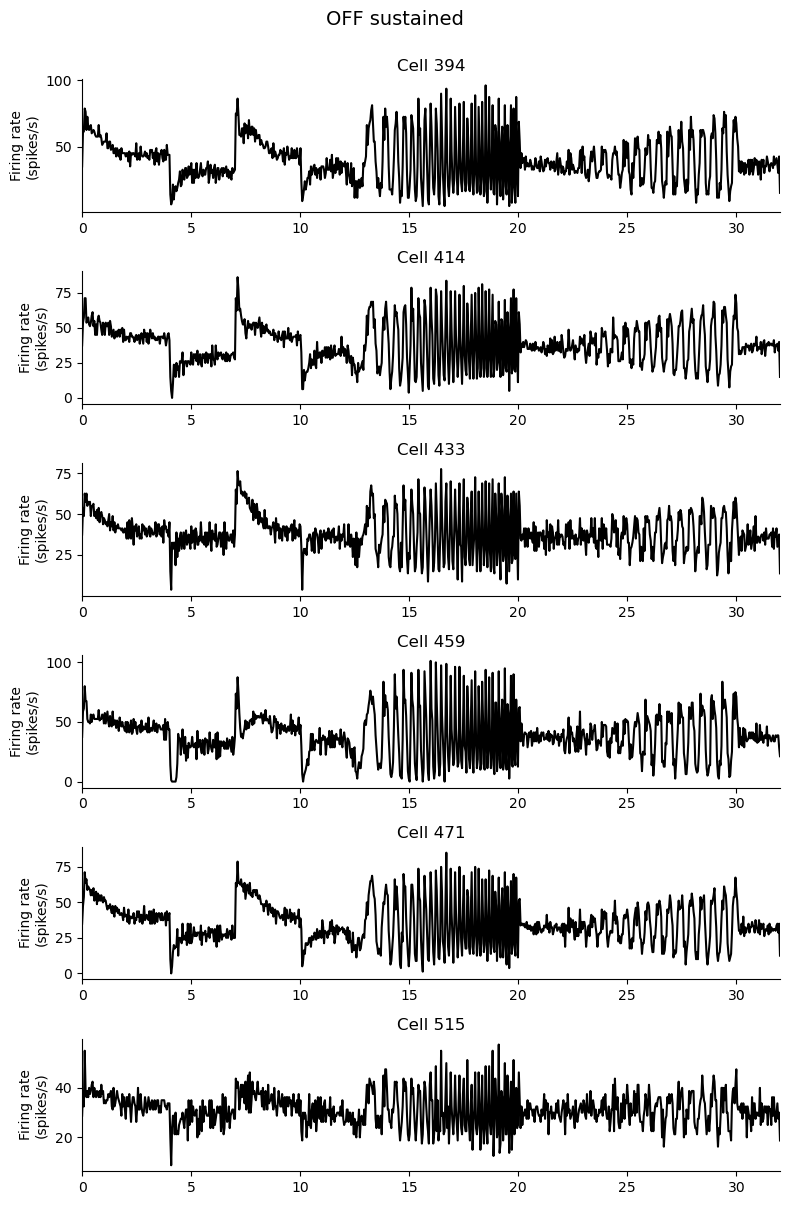

OFF mini alpha transient : [148 303 398 426 506 538]


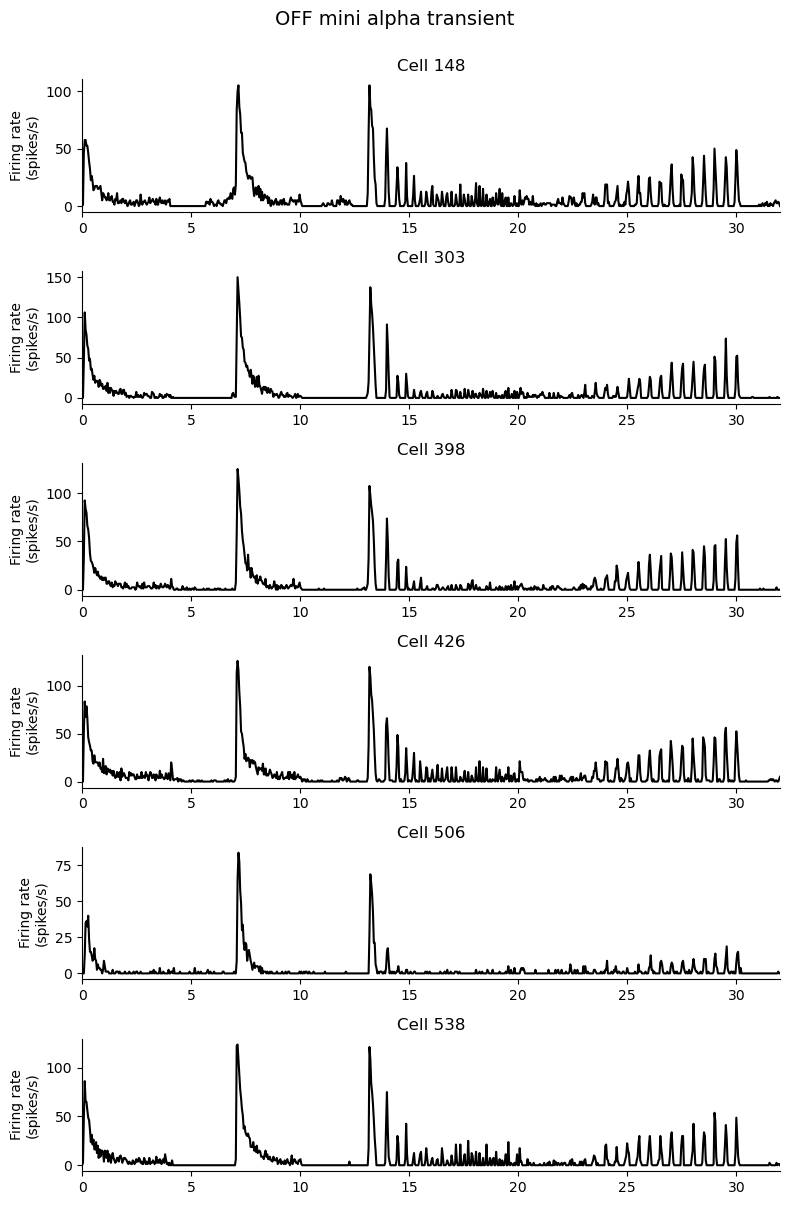

ON-OFF local-edge W3 : [392]


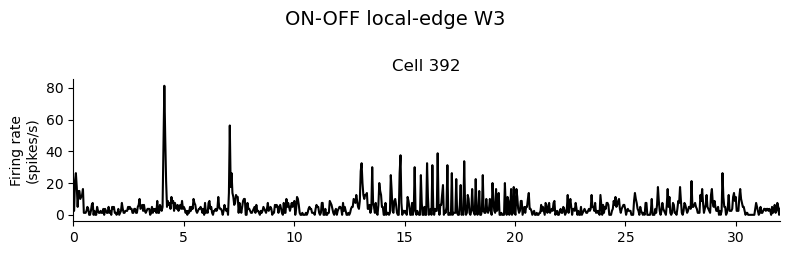

ON-OFF local : [44]


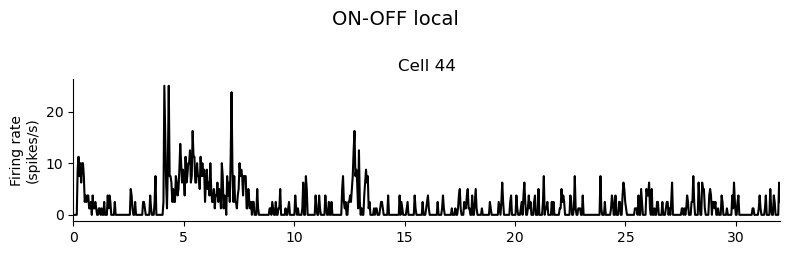

ON-OFF local OS : [165]


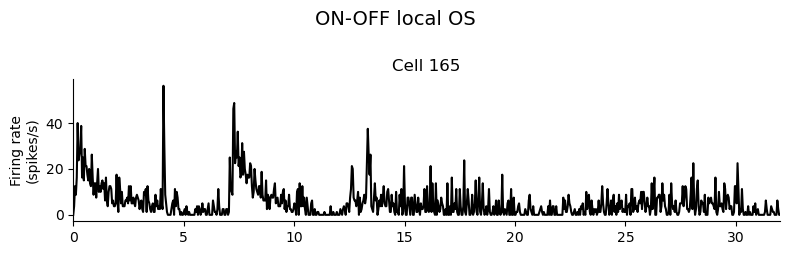

ON DS transient : [ 33 302 328 342]


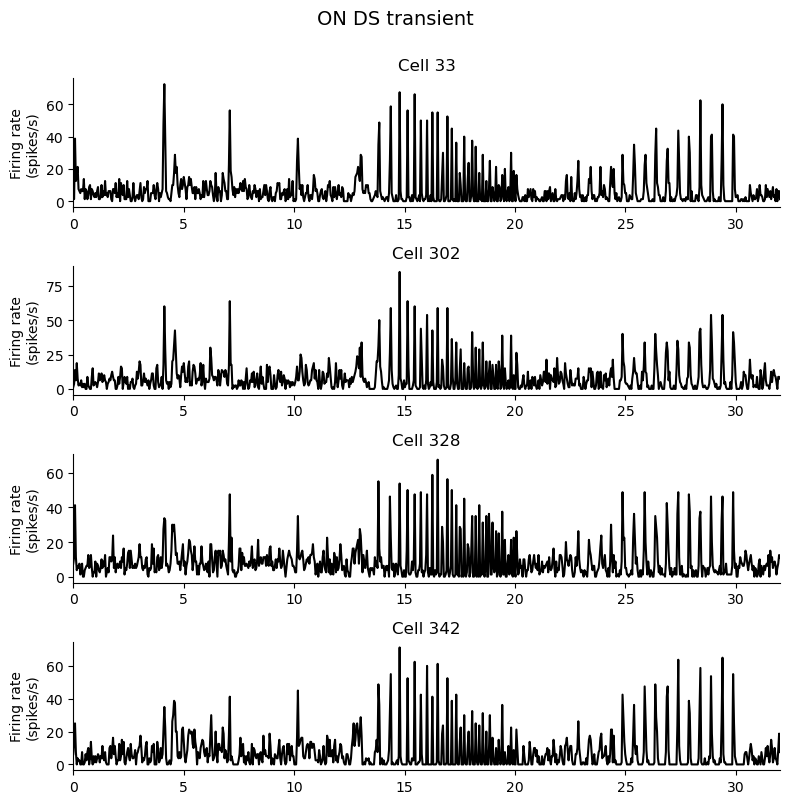

ON local transient OS : [210 585]


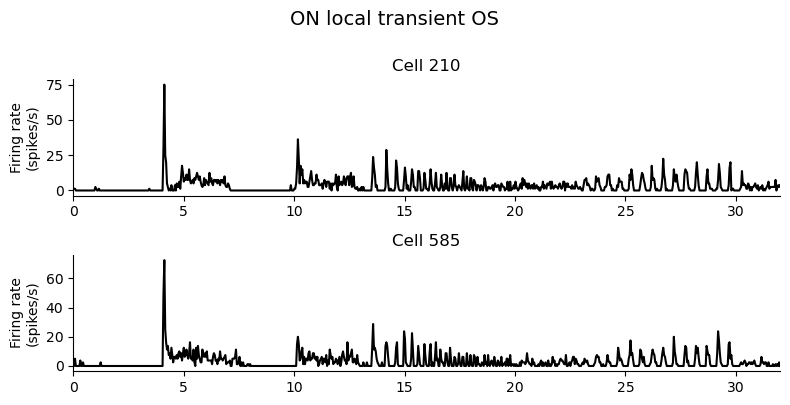

ON transient : [ 89  95  98 107 186]


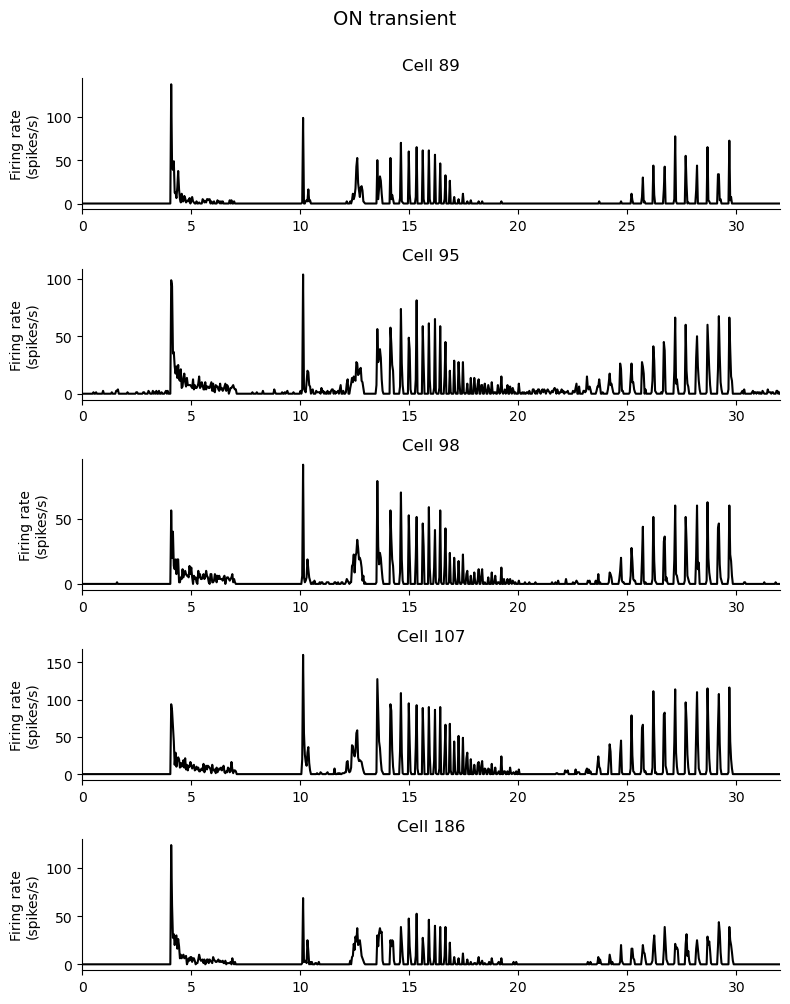

ON transient large : [406]


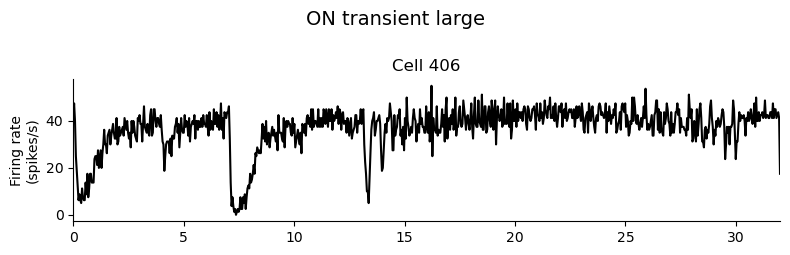

ON low frequency : [ 64 265]


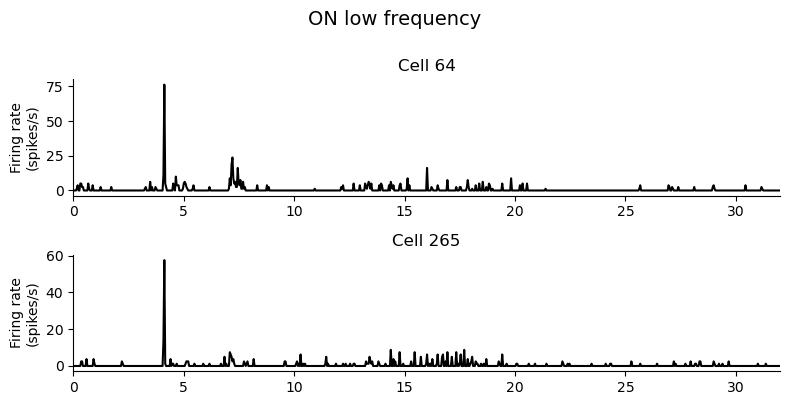

ON mini alpha : [103 110 145 160 179 235 340 399 417 435 462 579]


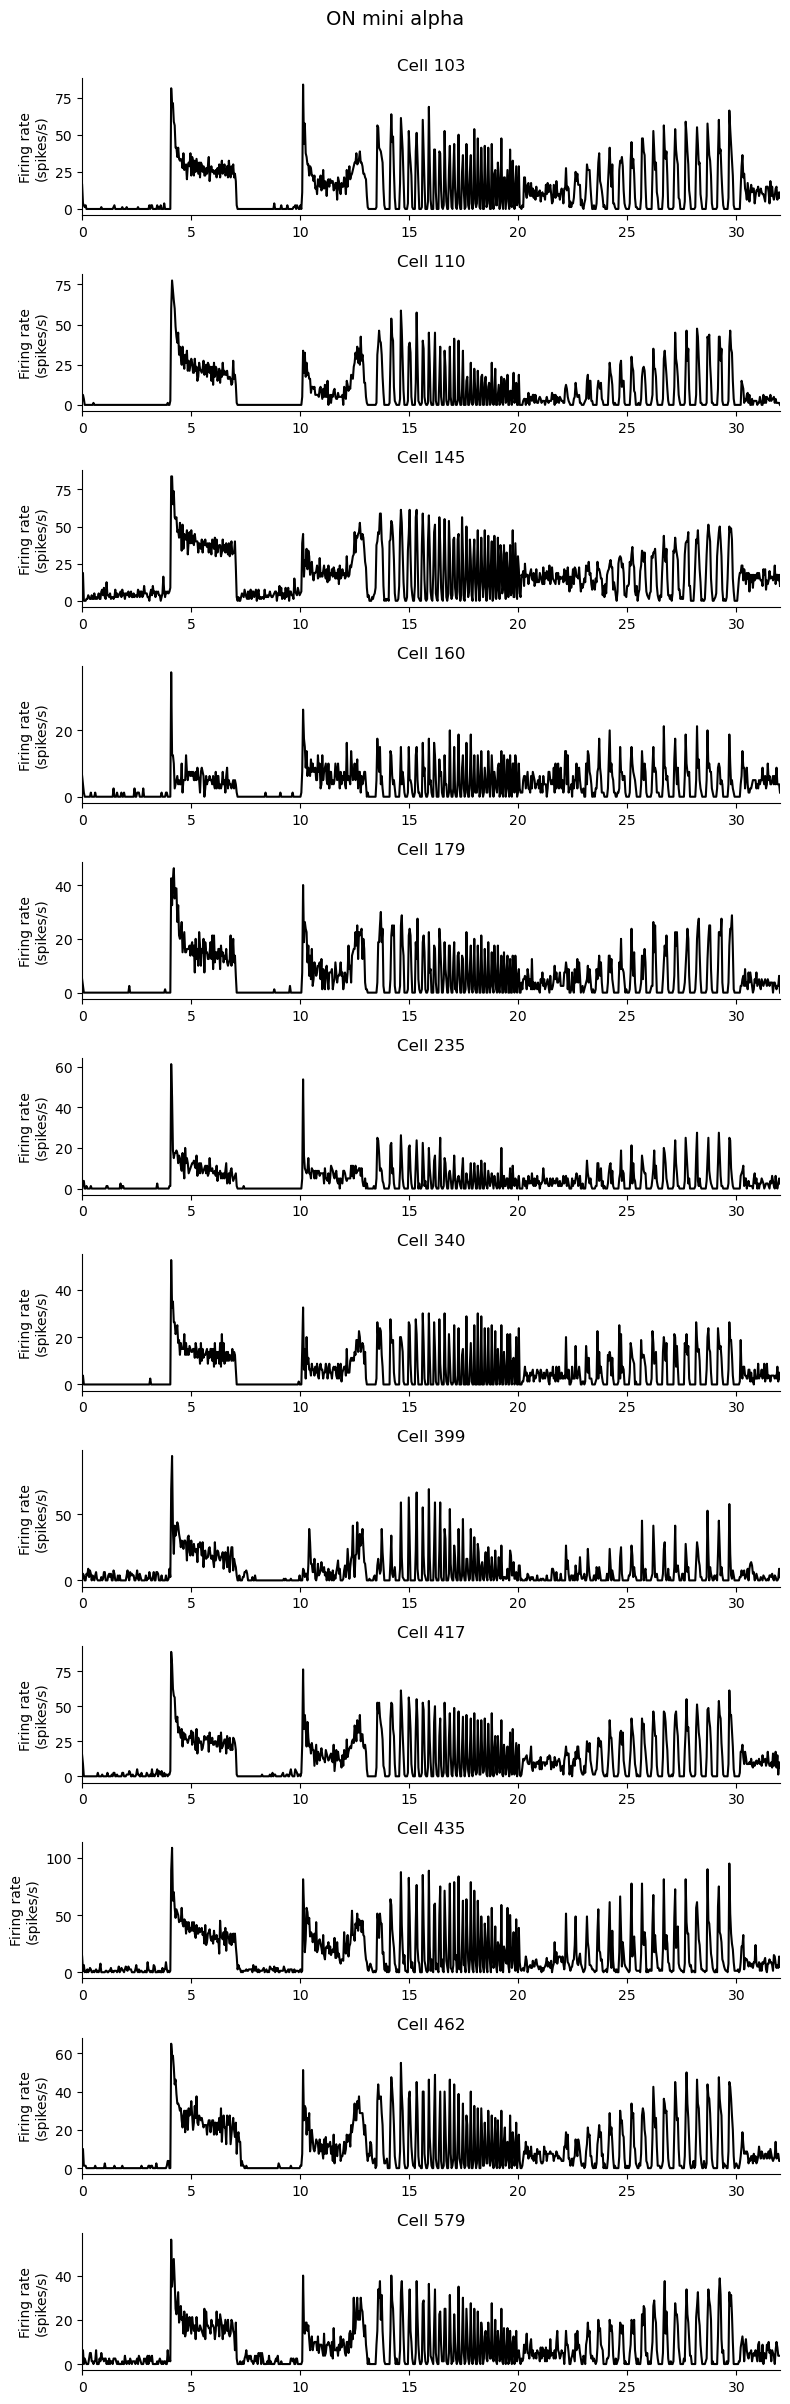

ON alpha : [ 77 129 184 217 229 246 310 381 393 396 405 418 458 472 476 479 491 498]


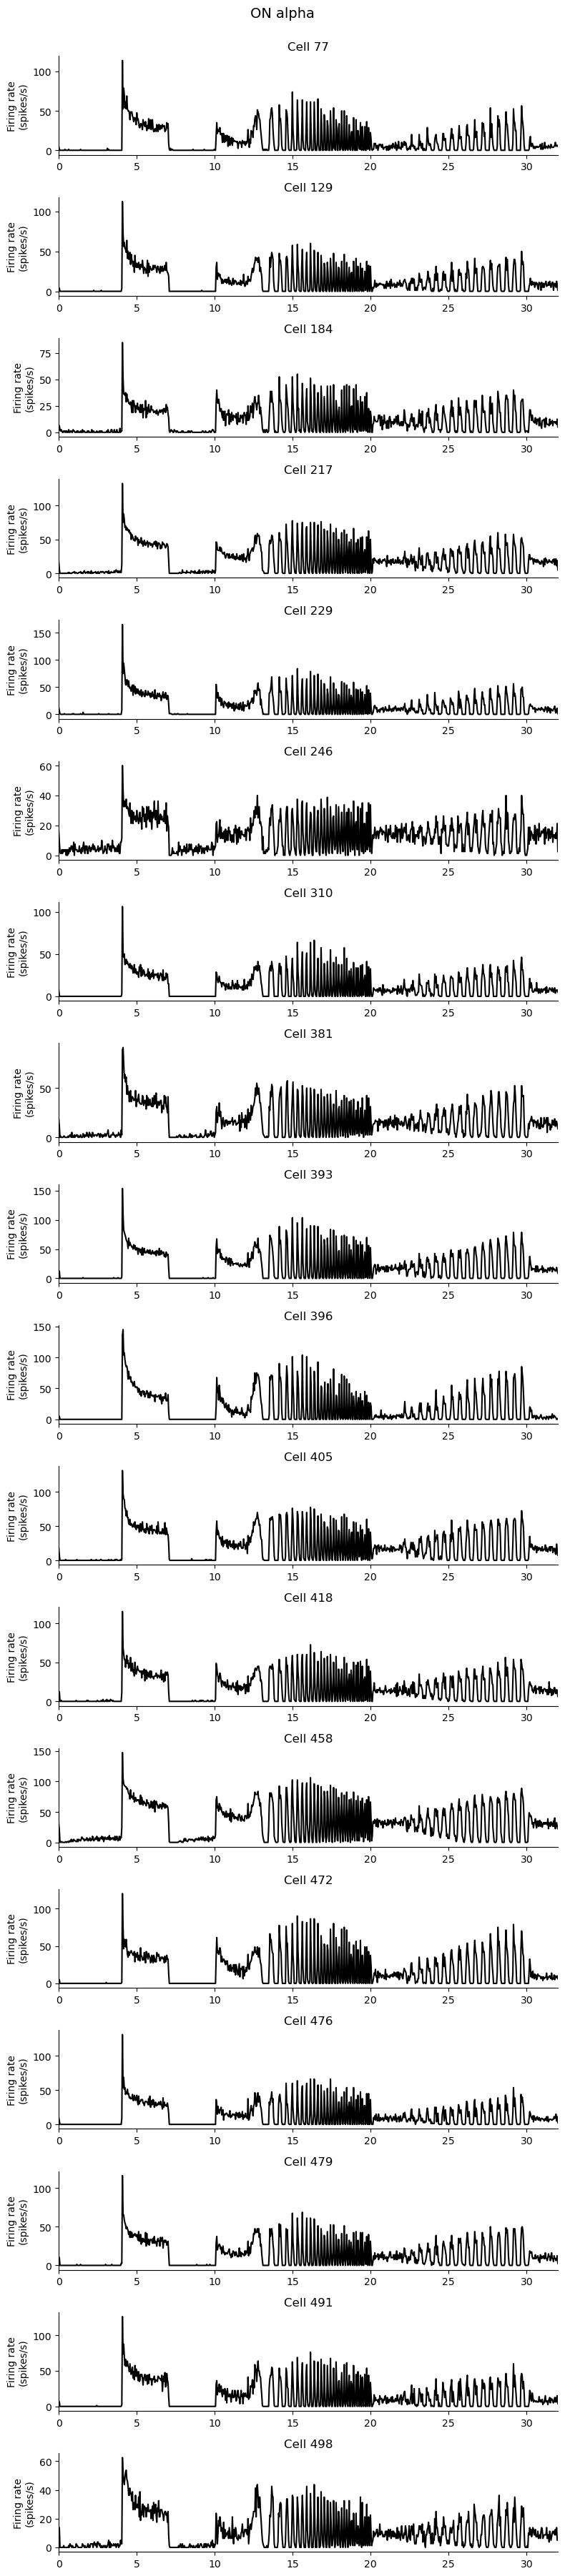

ON DS sustained 1 : [ 41  45 197 247 267 444]


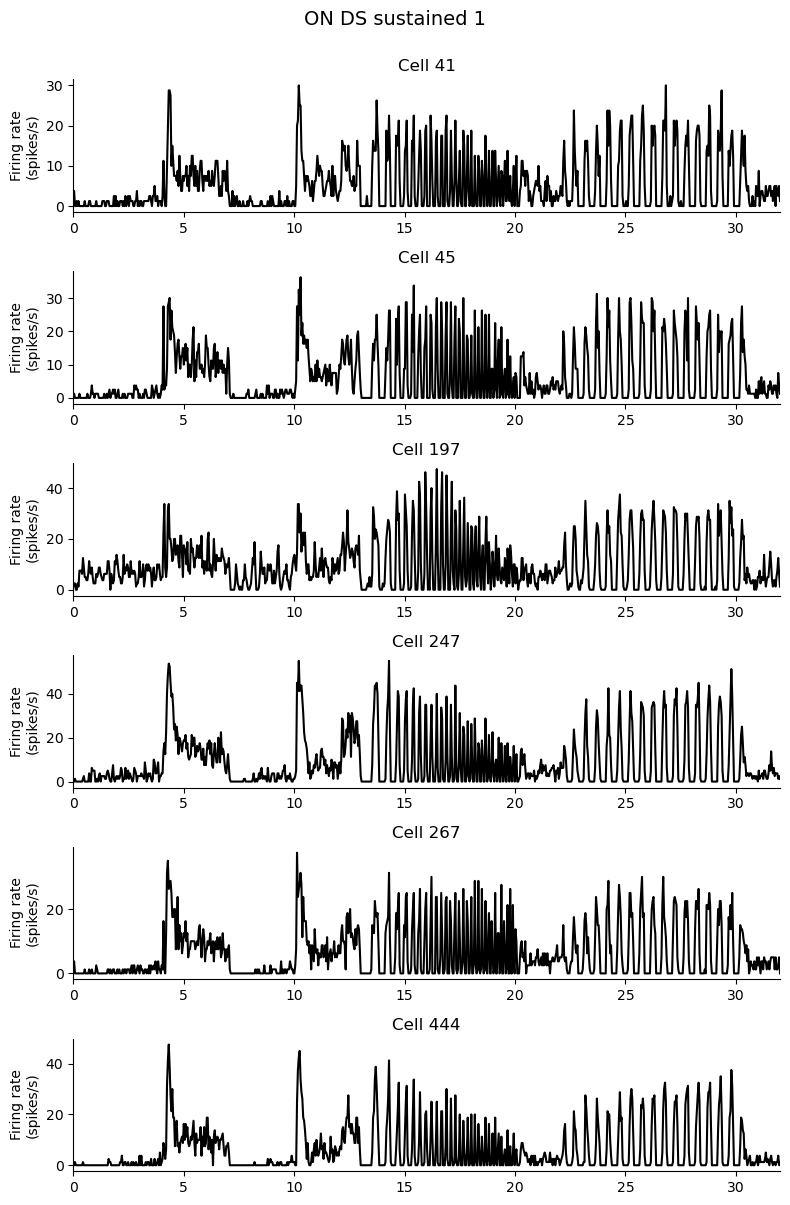

ON DS sustained 3 : [269 316]


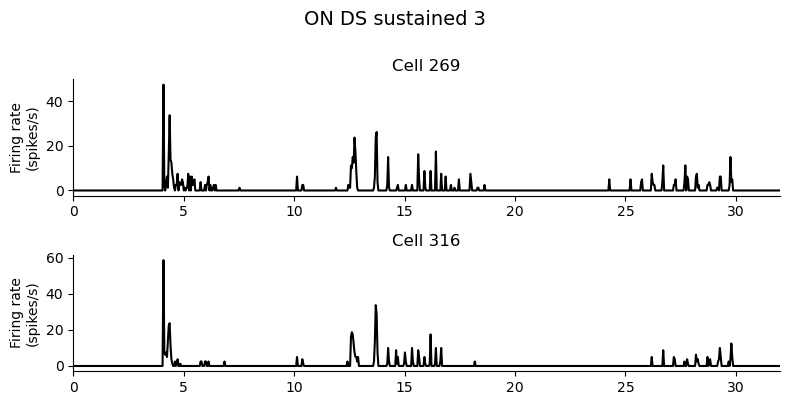

ON local sustained OS : [ 52 575]


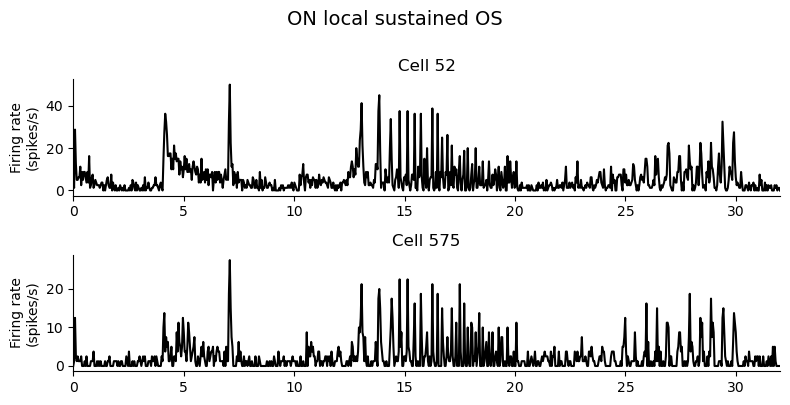

OFF suppression 2 : [  6  59 283 416 501]


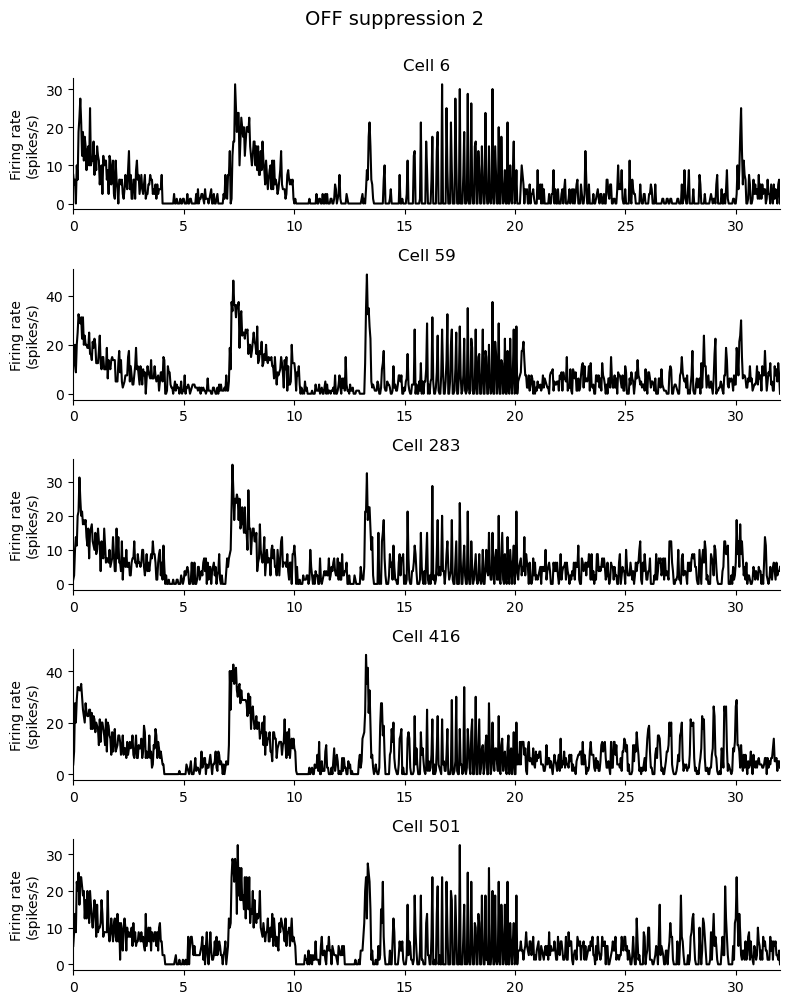

In [16]:
for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types_cleaned == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(8, 2.5))
        else:
            fig = plt.figure(figsize=(8, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 1)

        for i, cell_nb in enumerate(selected_cells):

            psth = cell_data[cell_nb]['psth']
            
            ax = fig.add_subplot(GS[i])
#             if euler_labels_cleaning[iLabel] == 1:
            ax.plot(np.linspace(0,32,800), psth, 'k')
#             elif euler_labels_cleaning[iLabel] == 0:
#                 ax.plot(np.linspace(0,32,800), psth, 'C3')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
        
        plt.tight_layout()
        plt.show()

In [17]:
# Save cleaned Baden type for each cell in 'selected_cells'
fsave = exp_path + str(exp) + '_celltype_Baden_cleaned_2024'
save_obj(cell_types_cleaned,fsave)

# Examine removed cells

114


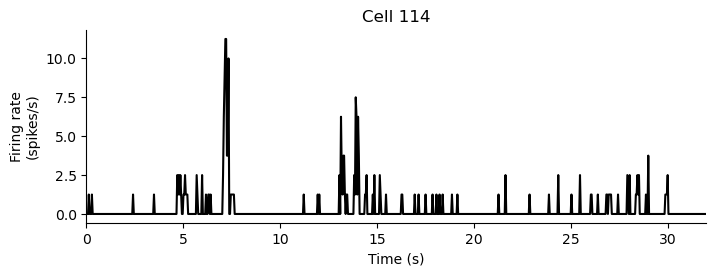

183


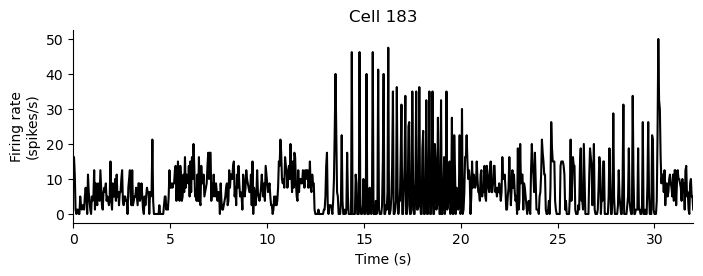

437


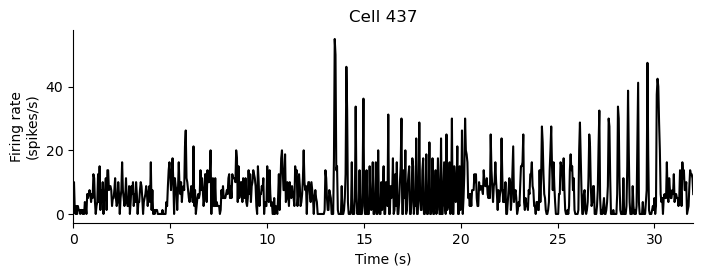

69


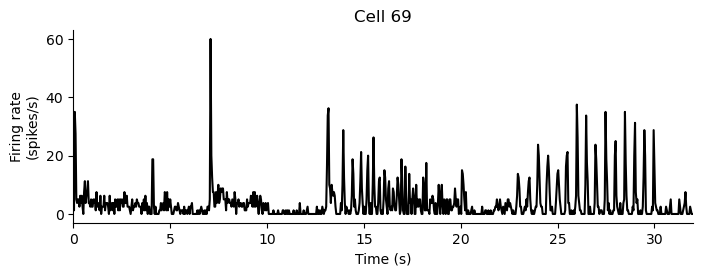

220


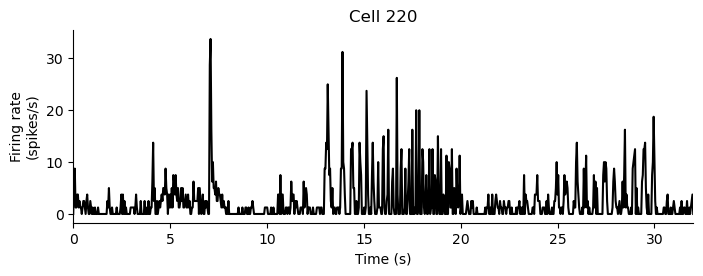

278


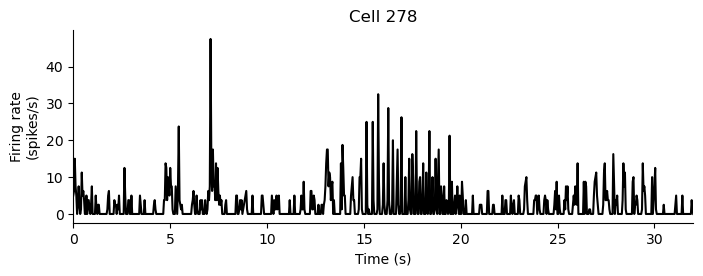

315


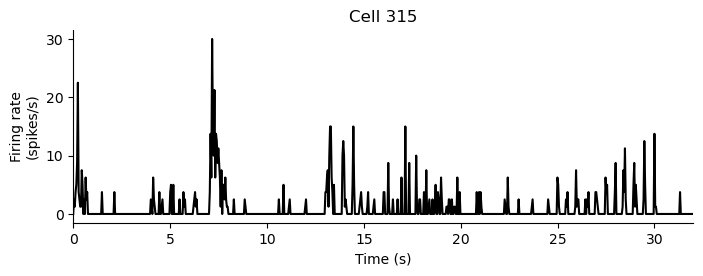

100


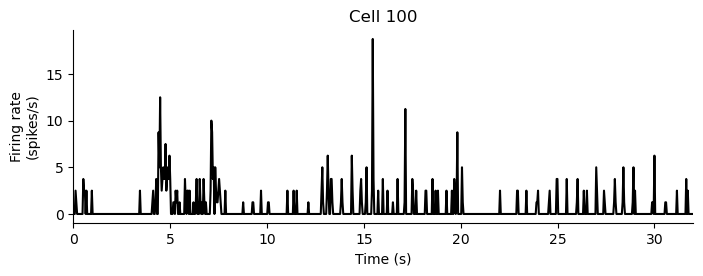

272


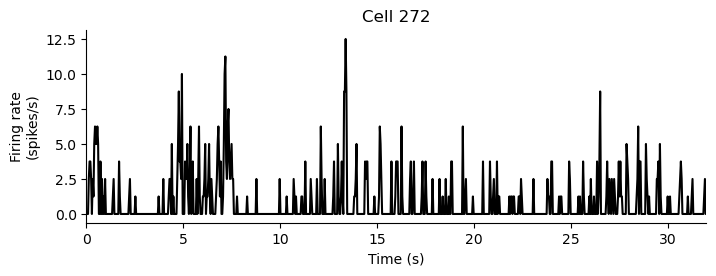

155


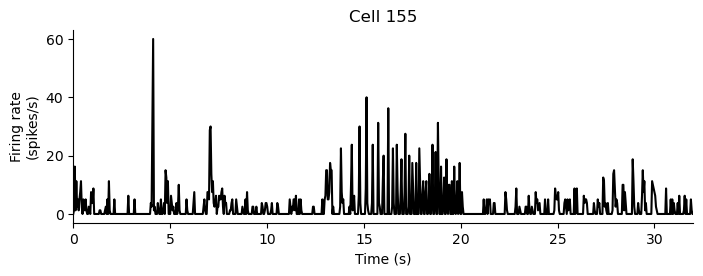

218


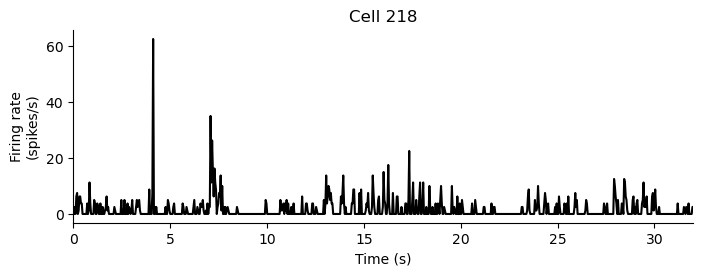

395


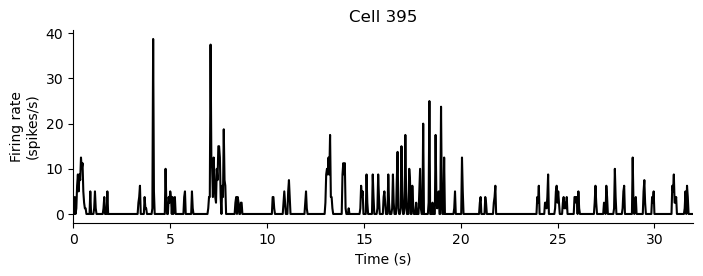

60


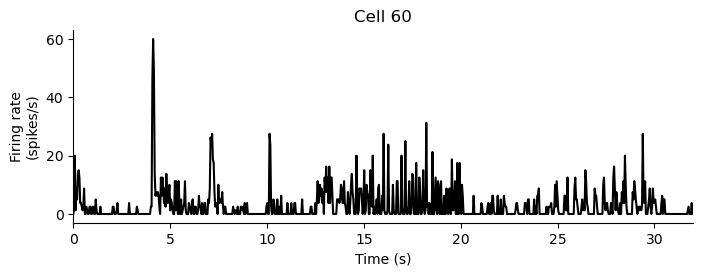

249


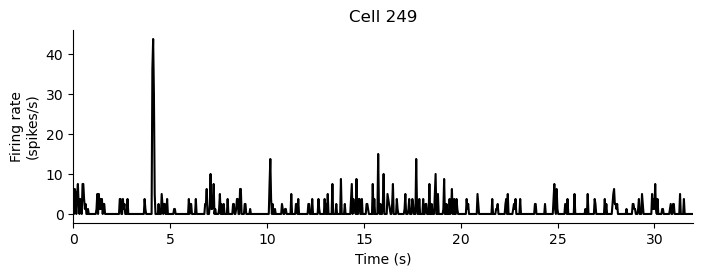

161


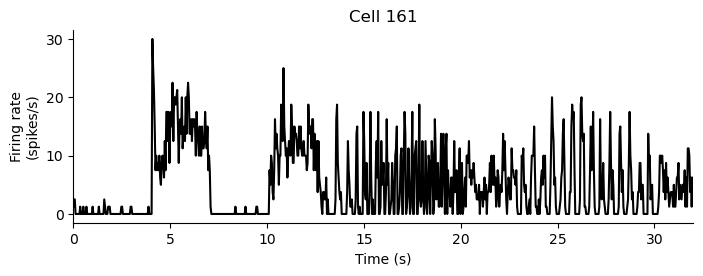

584


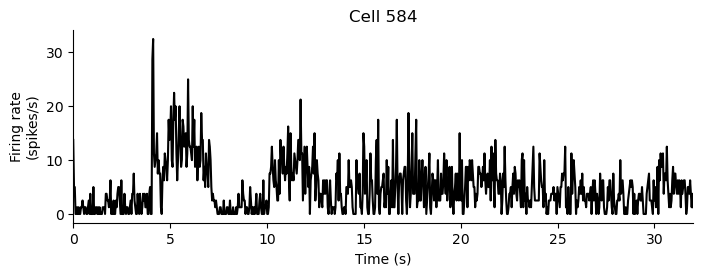

363


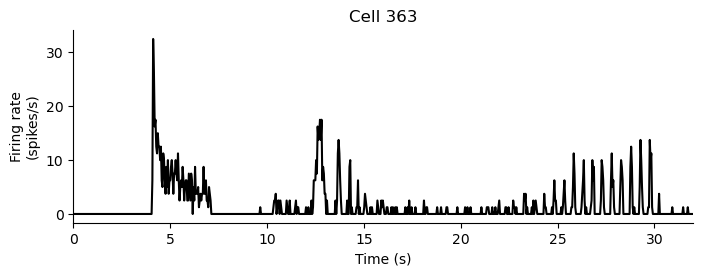

359


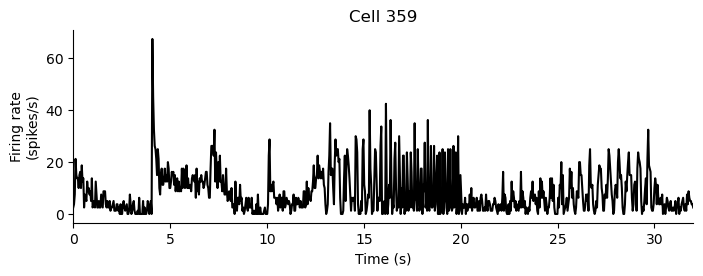

65


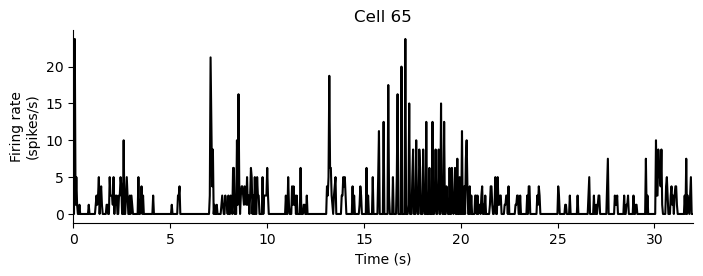

149


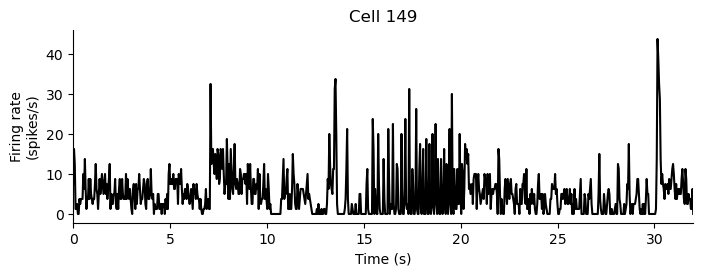

61


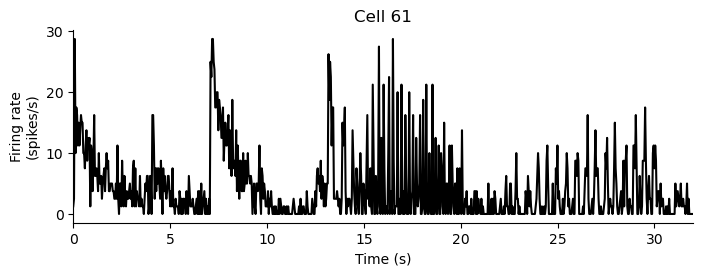

85


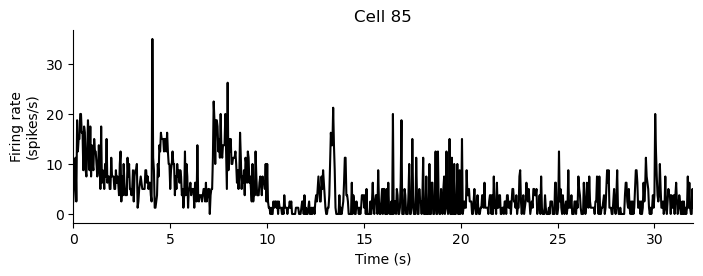

141


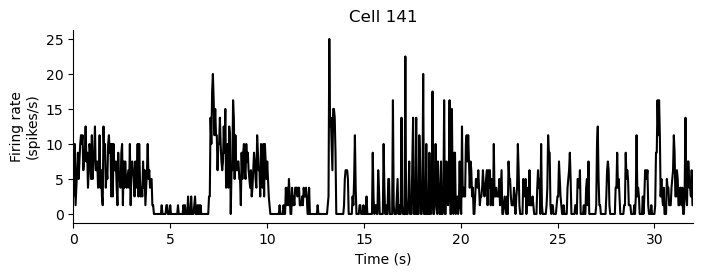

182


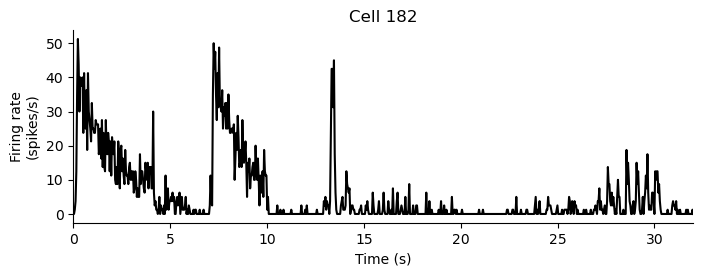

326


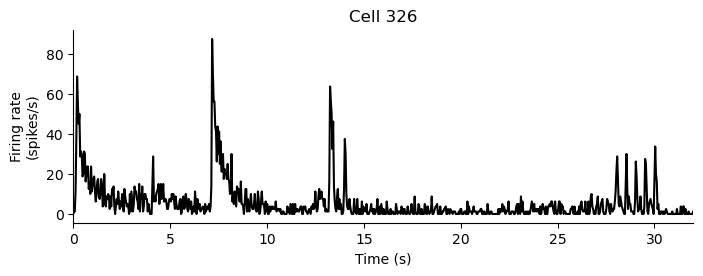

402


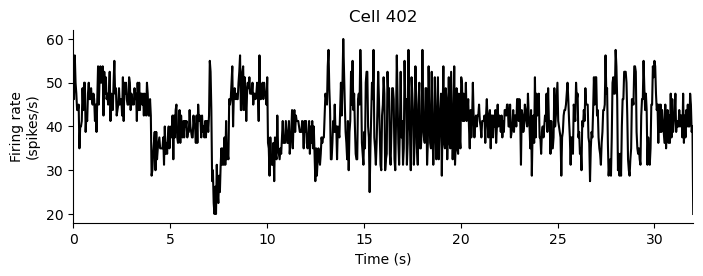

In [18]:
for cell_nb in removed_cells:
    print (cell_nb)
    fig = plt.figure(figsize=(8, 2.5))
    
    psth = cell_data[cell_nb]['psth']
    
    ax = fig.add_subplot(111)
    ax.plot(np.linspace(0,32,800), psth, 'k')
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Firing rate\n(spikes/s)")
    ax.set_title('Cell {}'.format(cell_nb))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, 32)
    
    plt.show()

            